# Milestone 1
Name : `Kamil Riyadi Alam Situmeang`

Batch : `FTDS009`

## I. Introduction

This project is meant for fulfilling `Hacktiv8 Fulltime Datascience Bootcamp Milestone-1 assignment.`

In this project, I will try to create end-to-end `Machine Learning` prediction model using several `Supervised Learning` algorithm that is available in `Sklearn` library.

### I.2 Dataset Description

Dataset for this project is made available by [`UCI Machine Learning Repository`](https://archive.ics.uci.edu/ml/about.html), collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms. \
You can check the dataset [here.](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) Under file name `bank-additional-full.csv`

**Data Set Information:**

The data is `related with direct marketing` campaigns of a Portuguese banking institution. `The marketing campaigns were based on phone calls`. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

------------------------------------------------------------------------------------------------------------------------------------------

**Attribute Information**

| No                                                        | Variables               | Description                                                                                                                                                                  |
| --------------------------------------------------------- | ----------------------- | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| \# bank client data:                                      |
| 1                                                         |  age (numeric)          | client's age                                                                                                                                                                            |
| 2                                                         |  job                    | type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') |
| 3                                                         |  marital                | marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)                                                            |
| 4                                                         |  education (categorical | (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')                                               |
| 5                                                         |  default                | has credit in default? (categorical: 'no','yes','unknown')                                                                                                                   |
| 6                                                         |  housing                | has housing loan? (categorical: 'no','yes','unknown')                                                                                                                        |
| 7                                                         |  loan                   | has personal loan? (categorical: 'no','yes','unknown')                                                                                                                       |
| \# related with the last contact of the current campaign: |
| 8                                                         |  contact                | contact communication type (categorical: 'cellular','telephone')                                                                                                             |
| 9                                                         |  month                  | last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')                                                                                             |
| 10                                                        |  day\_of\_week          |  last contact day of the week (categorical: 'mon','tue','wed','thu','fri')                                                                                                   |
| 11                                                        |  duration               | last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').                              |
| \# other attributes:                                      |
| 12                                                        |  campaign               | number of contacts performed during this campaign and for this client (numeric, includes last contact)                                                                       |
| 13                                                        |  pdays                  | number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)                          |
| 14                                                        |  previous               | number of contacts performed before this campaign and for this client (numeric)                                                                                              |
| 15                                                        |  poutcome               | outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')                                                                                  |
| \# social and economic context attributes                 |
| 16                                                        |  emp.var.rate           | employment variation rate - quarterly indicator (numeric)                                                                                                                    |
| 17                                                        |  cons.price.idx         | consumer price index - monthly indicator (numeric)                                                                                                                      |
| 18                                                        |  cons.conf.idx          | consumer confidence index - monthly indicator (numeric)                                                                                                                      |
| 19                                                        |  euribor3m              | euribor 3 month rate - daily indicator (numeric)                                                                                                                             |
| 20                                                        |  nr.employed            | number of employees - quarterly indicator (numeric)                                                                                                                          |
| Output variable (desired target):                         |
| 21                                                        |  y                      |  has the client subscribed a term deposit? (binary: 'yes','no')                                                                                                              |

------------------------------------------------------------------------------------------------------------------------------------------
**Additional notes:**\
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

**Note for variable #11 duration:**

this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Citation Request:**

This dataset is public available for research. The details are described in [Moro et al., 2014].
Please include this citation if you plan to use this database:

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

### I.3 Objectives

Main objectives for this project are:
- Create classification machine learning model using several `Supervised Learning` algorithm that is available in `Sklearn` library.
- Predict wether a client `will subscribe` a term deposit `or not` based on the data provided.

## II. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
from scipy import stats

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Data Preprocessing
from sklearn.model_selection import train_test_split
from feature_engine.outliers import OutlierTrimmer, Winsorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import PowerTransformer

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV

# Metric
from sklearn.metrics import classification_report, roc_auc_score, auc, RocCurveDisplay, roc_curve, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

## III. Data Loading


In [2]:
# Load Data and save it in `df_og` variable
df_og = pd.read_csv('bank-additional-full.csv', delimiter=';')

# Make copy from the df
df_raw = df_og.copy()

### Dataset Preview

In [3]:
# Show the dataset
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Dataset Check
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
# Dataset Shape
df_raw.shape

(41188, 21)

In [6]:
# Null value summary
df_raw.isnull().sum().sort_values()

age               0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
campaign          0
nr.employed       0
duration          0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
job               0
day_of_week       0
y                 0
dtype: int64

In [7]:
# Dataset Check
df_raw.describe(percentiles=[0.5]).T

,count,mean,std,min,50%,max
age,41188.0,40.024060,10.421250,17.000,38.000,98.000
duration,41188.0,258.285010,259.279249,0.000,180.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,2.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,1.100,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.749,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-41.800,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,4.857,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5191.000,5228.100


In [8]:
# Dataset Check
df_raw.describe(include='object').T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


Insight from `Dataset Preview` process:

Based on above process, I get these information:

- The dataset consist of `41188 rows` of entries and `21 columns.`
- There are `11 variables` that is `object type`, `5 variables` that is `integer type` and `5 variables` that is `float type`
- There are no apparent missing values but I am going to check more of it later in the process.
- From `.describe` process for `numerical parameter`, it looks like there are strange entry in variable `pdays`, it `min-max` value range equal to 999, I am going to check more of it later in the process.
- From `.describe` process for `categorical parameter`, it looks like there are no strange entry.

## IV. Exploratory Data Analysis

### Preliminary Check

Before going deep into the dataset, Let's generaly check the dataset.

In [9]:
# Duplicate entry check
df_raw.duplicated().sum()

12

Looks like there is 12 duplicate entry in the dataset. Let's handle it first.

In [10]:
# Drop duplicate entries
print('Shape Before : ', df_raw.shape)
df = df_raw.drop_duplicates()
df.reset_index(drop=True, inplace=True)
print('Shape After : ', df.shape)

# Confirmation
print('Duplicate entries : ', df.duplicated().sum())

Shape Before :  (41188, 21)
Shape After :  (41176, 21)
Duplicate entries :  0


Now let's get deeper with each variable.

In [11]:
# Preliminary Check
# Variable : age
# Description : Client's age

var = 'age'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe(percentiles=[0.5]))

variable: age
null value count:  0

Descriptive stats:
count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
50%         38.00000
max         98.00000
Name: age, dtype: float64


From result above We can see that minimum age is 17 and maximum age is 98, with mean of 40 years old.\
Looks like the `age` variable is good to go.

In [12]:
# Preliminary Check
# Variable : job
# Description : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

var = 'job'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())

variable: job
null value count:  0

Unique Value Count: 12
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


`job` variable is already match the description.
For now, I'll just renaming `admin.` into `admin`

In [13]:
# Rename `admin.` to `admin`
df.loc[df['job'] == 'admin.', 'job'] = 'admin'

# Confirmation
print(df[var].unique())

['housemaid' 'services' 'admin' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [14]:
# Preliminary Check
# Variable : marital
# Description : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

var = 'marital'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())

variable: marital
null value count:  0

Unique Value Count: 4
['married' 'single' 'divorced' 'unknown']


Looks like `marital` variable is already match the column description, So I guess it's good to go.

In [15]:
# Preliminary Check
# Variable : education
# Description :  'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown'

var = 'education'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())

variable: education
null value count:  0

Unique Value Count: 8
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']


I'll renaming the categories into more cleaner look.

In [16]:
# Renaming Categories

# Make dictionary
cat_rename = {'basic.4y': 'basic_4y', 'basic.6y': 'basic_6y', 'basic.9y': 'basic_9y', 'high.school': 'high_school', 'professional.course': 'professional_course', 'university.degree':'university_degree', 'illiterate': 'illiterate', 'unknown': 'unknown'}
# Renaming process
df['education'] = df['education'].map(cat_rename)
# Confirmation
print(df['education'].unique())

['basic_4y' 'high_school' 'basic_6y' 'basic_9y' 'professional_course'
 'unknown' 'university_degree' 'illiterate']


In [17]:
# Preliminary Check
# Variable : default
# Description : has credit in default? (categorical: 'no','yes','unknown')

var = 'default'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())

variable: default
null value count:  0

Unique Value Count: 3
['no' 'unknown' 'yes']


Looks like `default` variable is already match the column description, So I guess it's good to go.

In [18]:
# Preliminary Check
# Variable : housing
# Description : has housing loan? (categorical: 'no','yes','unknown')

var = 'housing'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())

variable: housing
null value count:  0

Unique Value Count: 3
['no' 'yes' 'unknown']


Looks like `housing` variable is already match the column description, So I guess it's good to go.

In [19]:
# Preliminary Check
# Variable : loan
# Description : has personal loan? (categorical: 'no','yes','unknown')

var = 'loan'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())

variable: loan
null value count:  0

Unique Value Count: 3
['no' 'yes' 'unknown']


Looks like `loan` variable is already match the column description, So I guess it's good to go.

In [20]:
# Preliminary Check
# Variable : contact
# Description : contact communication type (categorical: 'cellular','telephone')

var = 'contact'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())

variable: contact
null value count:  0

Unique Value Count: 2
['telephone' 'cellular']


Looks like `contact` variable is already match the column description, So I guess it's good to go.

In [21]:
# Preliminary Check
# Variable : month
# Description : last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
var = 'month'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())
print(df[var].dtype)

variable: month
null value count:  0

Unique Value Count: 10
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
object


Let's convert `month` variable into numerical format.

In [22]:
# Convert to numerical format
# Make dictionary
month_rename = {'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4, 'sep':9}
# Renaming process
df['month'] = df['month'].map(month_rename).astype(object)
# Confirmation
print(df['month'].unique())

[5 6 7 8 10 11 12 3 4 9]


Looks like this variable is good to go.

In [23]:
# Preliminary Check
# Variable : day_of_week
# Description : last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

var = 'day_of_week'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())
print(df[var].dtype)

variable: day_of_week
null value count:  0

Unique Value Count: 5
['mon' 'tue' 'wed' 'thu' 'fri']
object


Let's convert `day_of_week` variable into numerical format.

In [24]:
# Convert to numerical format
# Make dictionary
days_rename = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5,}
# Renaming process
df['day_of_week'] = df['day_of_week'].map(days_rename)
# Confirmation
print(df['day_of_week'].unique())

[1 2 3 4 5]


I have `month` and `days_of_week` variable, looks like I am able to create `year` variables.\
I'll generate `year` variable from given informatin:

`bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]`

We know that this dataset is already sorted from May 2008 to November 2010, so I will use this information to generate `year` variable.

In [25]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic_4y,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high_school,unknown,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high_school,no,yes,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin,married,basic_6y,no,no,no,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high_school,no,no,yes,telephone,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [26]:
# Check index in current dataframe to identify each year starting and end index.
print('first month:',df['month'].iloc[0])
print('last month:',df['month'].iloc[-1])

first month: 5
last month: 11


from code above We know that first entry in the dataset is May (and should be in year 2008), and last entry is November (and should be in year 2010), from this information I can generate the `year` variable. Let's continue the process.

In [27]:
# Check index for December
df[
    (df['month']==12)
][['month', 'day_of_week']].head(15)

,month,day_of_week
27672,12,1
27673,12,3
27674,12,4
27675,12,5
27676,12,5
27677,12,1
27678,12,2
27679,12,4
27680,12,5
27681,12,1


In [28]:
# Check index for December
df[
    (df['month']==12)
][['month', 'day_of_week']].tail(5)

,month,day_of_week
39113,12,3
39114,12,3
39115,12,3
39116,12,4
39117,12,4


From above process, by looking at index number, We can spot :
- First jump in the index number at `27681` and then jump to `38947`, this translates to `index 0 to 27681` is in year 2008.
- We know that last entry supposed to be `November 2010`, by that fact, the last index of `December` which is `39117` shows last entry in year 2009, this translates to `index 27682 to 39117` is in year 2009.
- Hence the rest index from `index 39118 to end` is in year 2010.

Let's add above information into our dataset.

In [29]:
# Create year list
year_list = []
for i in range(len(df)):
    if i <= 27681:
        year_list.append(2008)
    elif i > 27681 and i <= 39117:
        year_list.append(2009)
    else:
        year_list.append(2010)

# Insert `year_list` as new `year` variable
df.insert(loc=8, column='year', value=year_list)

It's good to go, let's continue the process.

In [30]:
# Preliminary Check
# Variable : duration  
# Description : last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').

var = 'duration'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: duration
null value count:  0

Descriptive stats:
count    41176.0
mean       258.0
std        259.0
min          0.0
25%        102.0
50%        180.0
75%        319.0
max       4918.0
Name: duration, dtype: float64


Looks like this variable has extreme range between `min and max` values, this may indicate that there is an outliers in the dataset. I will handle it later in the `handling outliers` process.

In [31]:
# Preliminary Check
# Variable : campaign 
# Description : number of contacts performed during this campaign and for this client (numeric, includes last contact)

var = 'campaign'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: campaign
null value count:  0

Descriptive stats:
count    41176.0
mean         3.0
std          3.0
min          1.0
25%          1.0
50%          2.0
75%          3.0
max         56.0
Name: campaign, dtype: float64


Looks like this variable has high range between `min and max` values, this may indicate that there is an outliers in the dataset. I will handle it later in the `handling outliers` process.

In [32]:
# Preliminary Check
# Variable : pdays 
# Description : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

var = 'pdays'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: pdays
null value count:  0

Descriptive stats:
count    41176.0
mean       962.0
std        187.0
min          0.0
25%        999.0
50%        999.0
75%        999.0
max        999.0
Name: pdays, dtype: float64


This variable has extreme range between `min and max` values, this may indicate that there is an outliers in the dataset. I will handle it later in the `handling outliers` process.

In [33]:
# Preliminary Check
# Variable : previous 
# Description : number of contacts performed before this campaign and for this client (numeric)

var = 'previous'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: previous
null value count:  0

Descriptive stats:
count    41176.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          7.0
Name: previous, dtype: float64


Looks like this variable has high range between `min and max` values, this may indicate that there is an outliers in the dataset. I will handle it later in the `handling outliers` process.

In [34]:
# Preliminary Check
# Variable : poutcome
# Description : outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
var = 'poutcome'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())
print(df[var].dtype)

variable: poutcome
null value count:  0

Unique Value Count: 3
['nonexistent' 'failure' 'success']
object


Looks like this variable is good to go.

In [35]:
# Preliminary Check
# Variable : emp.var.rate 
# Description : employment variation rate - quarterly indicator (numeric)

var = 'emp.var.rate'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: emp.var.rate
null value count:  0

Descriptive stats:
count    41176.0
mean         0.0
std          2.0
min         -3.0
25%         -2.0
50%          1.0
75%          1.0
max          1.0
Name: emp.var.rate, dtype: float64


I don't quite understand what the `emp.var.rate` variable is. I'll let it be right now. I'll just change the variable name into more cleaner look.

In [36]:
# Change variable name
df.rename(columns={'emp.var.rate':'emp_var_rate'}, inplace=True)

In [37]:
# Preliminary Check
# Variable : cons.price.idx
# Description : consumer price index - monthly indicator (numeric)


var = 'cons.price.idx'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: cons.price.idx
null value count:  0

Descriptive stats:
count    41176.0
mean        94.0
std          1.0
min         92.0
25%         93.0
50%         94.0
75%         94.0
max         95.0
Name: cons.price.idx, dtype: float64


I don't quite understand what the `cons.price.idx` variable is. I'll let it be right now. I'll just change the variable name into more cleaner look.

In [38]:
# Change variable name
df.rename(columns={'cons.price.idx':'cons_price_idx'}, inplace=True)

In [39]:
# Preliminary Check
# Variable : cons.conf.idx
# Description : consumer confidence index - monthly indicator (numeric)
var = 'cons.conf.idx'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())

# Additional explanation
#Consumer confidence, measured by the Consumer Confidence Index (CCI), is defined as the degree of optimism about the state of the economy that consumers are expressing through their activities of saving and spending.

variable: cons.conf.idx
null value count:  0

Descriptive stats:
count    41176.0
mean       -41.0
std          5.0
min        -51.0
25%        -43.0
50%        -42.0
75%        -36.0
max        -27.0
Name: cons.conf.idx, dtype: float64


I don't quite understand what the `cons.conf.idx` variable is. I'll let it be right now. I'll just change the variable name into more cleaner look.

In [40]:
# Change variable name
df.rename(columns={'cons.conf.idx':'cons_conf_idx'}, inplace=True)

In [41]:
# Preliminary Check
# Variable : euribor3m
# Description : euribor 3 month rate - daily indicator (numeric)
var = 'euribor3m'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())


variable: euribor3m
null value count:  0

Descriptive stats:
count    41176.0
mean         4.0
std          2.0
min          1.0
25%          1.0
50%          5.0
75%          5.0
max          5.0
Name: euribor3m, dtype: float64


looks like this variable is good to go.

In [42]:
# Preliminary Check
# Variable : nr.employed
# Description : number of employees - quarterly indicator (numeric)
var = 'nr.employed'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Descriptive stats:')
print(df[var].describe().round())

variable: nr.employed
null value count:  0

Descriptive stats:
count    41176.0
mean      5167.0
std         72.0
min       4964.0
25%       5099.0
50%       5191.0
75%       5228.0
max       5228.0
Name: nr.employed, dtype: float64


Looks like this variable is good to go. I'll just change the variable name into more cleaner look.

In [43]:
# Change variable name
df.rename(columns={'nr.employed':'nr_employed'}, inplace=True)

In [44]:
# Preliminary Check
# Variable : y
# Description :  has the client subscribed a term deposit? (binary: 'yes','no')
var = 'y'

print('variable:', var)
print('null value count: ', df[var].isnull().sum())
print()
print('Unique Value Count:', df[var].nunique())
print(df[var].unique())
print(df[var].dtype)

variable: y
null value count:  0

Unique Value Count: 2
['no' 'yes']
object


Looks like this variable is good to go. I'll just change the variable name into more cleaner look and change the input into `no:0` and `yes:1`.

In [45]:
# Convert to numerical format
# Make dictionary
y_rename = {'yes':1, 'no':0}
# Renaming process
df['y'] = df['y'].map(y_rename)
# Confirmation
print(df['y'].unique())

[0 1]


In [46]:
# Rename variable
df.rename(columns={'y':'subs_status'}, inplace=True)

### Univaraite Analysis

[The purpose of univariate analysis is to understand the distribution of values for a single variable.](https://www.statology.org/univariate-analysis/)

Since our target parameter is `subscription status`, let's get to know about it more deeply.

In [47]:
# Number of unique value
print(df['subs_status'].value_counts())
print()
print(df['subs_status'].value_counts(normalize=True)*100)

0    36537
1     4639
Name: subs_status, dtype: int64

0    88.733728
1    11.266272
Name: subs_status, dtype: float64


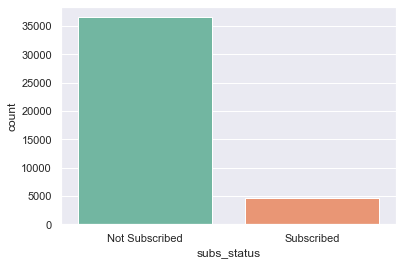

In [48]:
# Distribution Check

g= sns.countplot(df['subs_status'], palette='Set2')
g.set(xticklabels=['Not Subscribed', 'Subscribed'])
plt.show()

Insight from `Univariate Analysis`:

Here are information that We can get from process above:
- The target paramater `subs_status` is `categorical` parameter that has two unique value which is `Yes/1` and `No/0`
- In the dataset, the majority of the instances is category `No/0` which fill `88.74%` of total instance.
- Hence the dataset is considered as imbalance dataset.

### Bivariate Analysis

[The purpose of bivariate analysis is to understand the relationship between two variables.](https://www.statology.org/bivariate-analysis/)

In this part of sub-process, I will try to explore some facts inside the dataset with `Subs_status` variable as my focus.

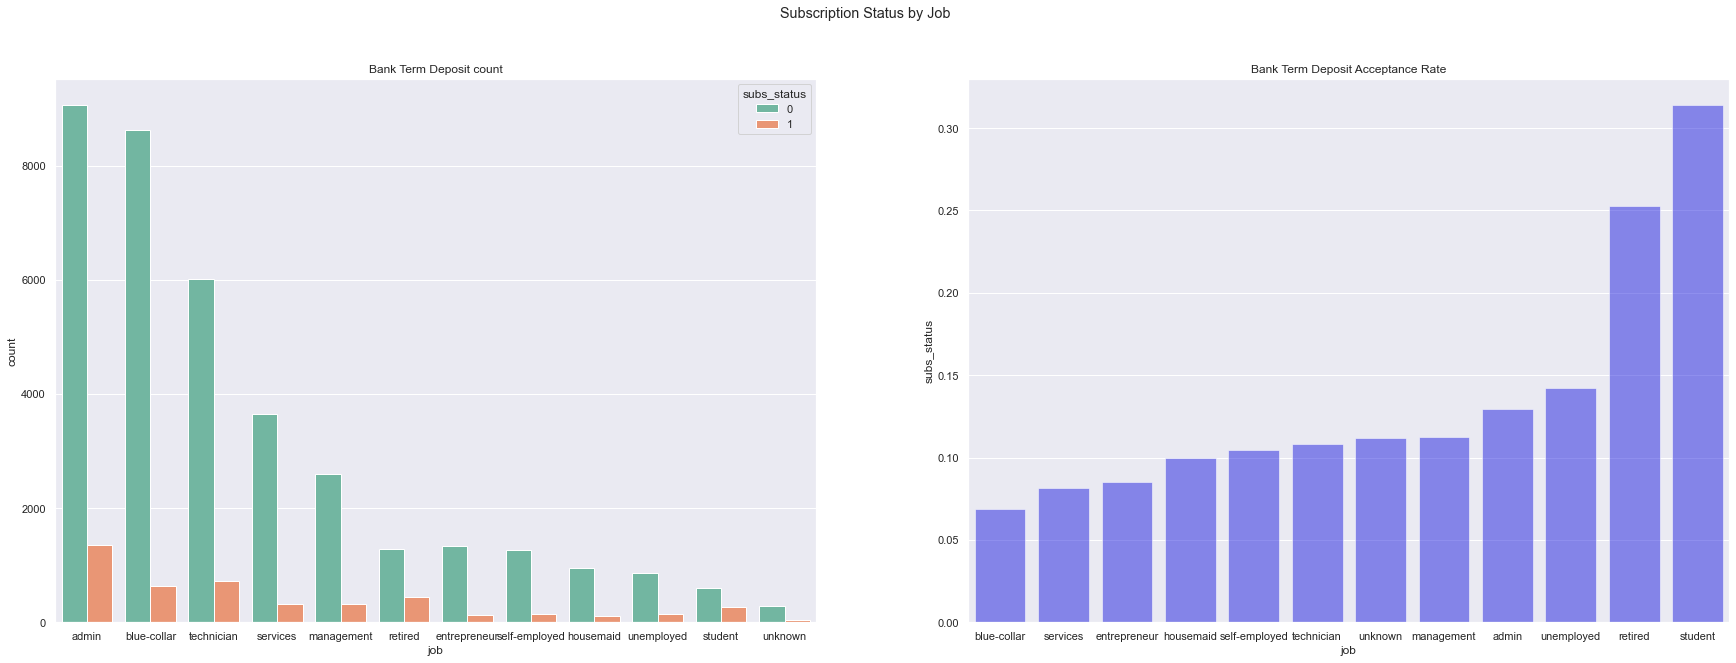

In [49]:
# Analysis by the `job` variable
fig, ax = plt.subplots(1,2, figsize=(30, 10))
plt.suptitle('Subscription Status by Job')

sns.countplot(df['job'], hue=df['subs_status'], palette='Set2', order=df['job'].value_counts().index, ax=ax[0])
ax[0].set_title('Bank Term Deposit count')

graph = df.groupby('job')['subs_status'].mean().sort_values()
sns.barplot(x=graph.index, y=graph, color='blue', alpha=0.5, ax=ax[1])
ax[1].set_title('Bank Term Deposit Acceptance Rate')

plt.show()

Based on above graph, We can see that:
- `admin` and `blue-collar` are the frequent contacted client by the company. 
- In contrast, `students` and `retired` has highest acceptance rate.
- From graph on the right, I can extract the `job` ordinality according to the `subs_status` variable.

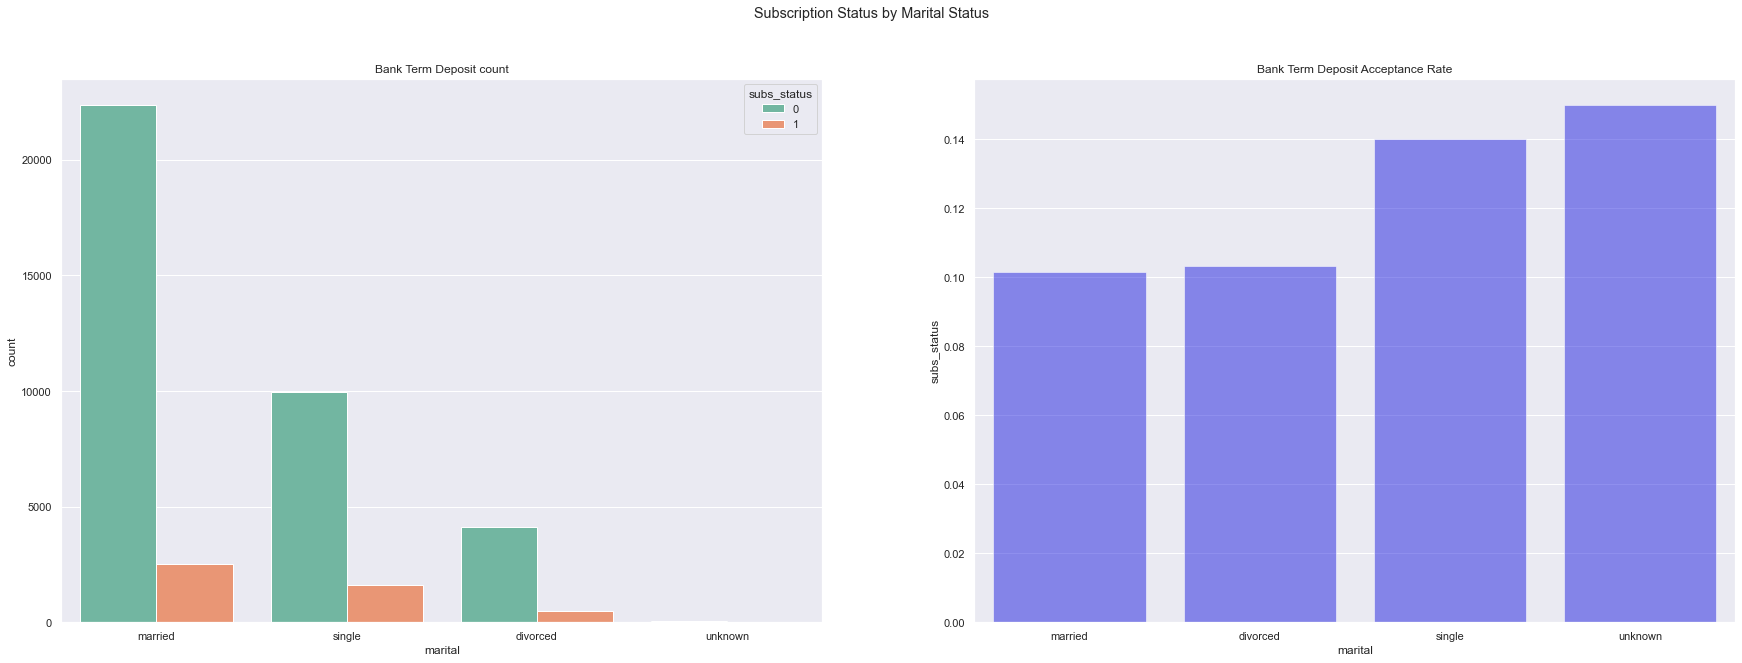

In [50]:
# Analysis by the `marital` variable
fig, ax = plt.subplots(1,2, figsize=(30, 10))
plt.suptitle('Subscription Status by Marital Status')

sns.countplot(df['marital'], hue=df['subs_status'], palette='Set2', order=df['marital'].value_counts().index, ax=ax[0])
ax[0].set_title('Bank Term Deposit count')

graph = df.groupby('marital')['subs_status'].mean().sort_values()
sns.barplot(x=graph.index, y=graph, color='blue', alpha=0.5, ax=ax[1])
ax[1].set_title('Bank Term Deposit Acceptance Rate')

plt.show()

Based on above graph, We can see that:
- `married` and `single` clients are the frequent contacted client by the company. 
- In contrast, although `unknown` is the smallest class of all, they has the highest acceptance rate, followed by `single`.
- From graph on the right, I can extract the `marital` ordinality according to the `subs_status` variable.

Now let's utilize our newly generated `year` variable to see the correlation between `year` and `subs_status` variable.

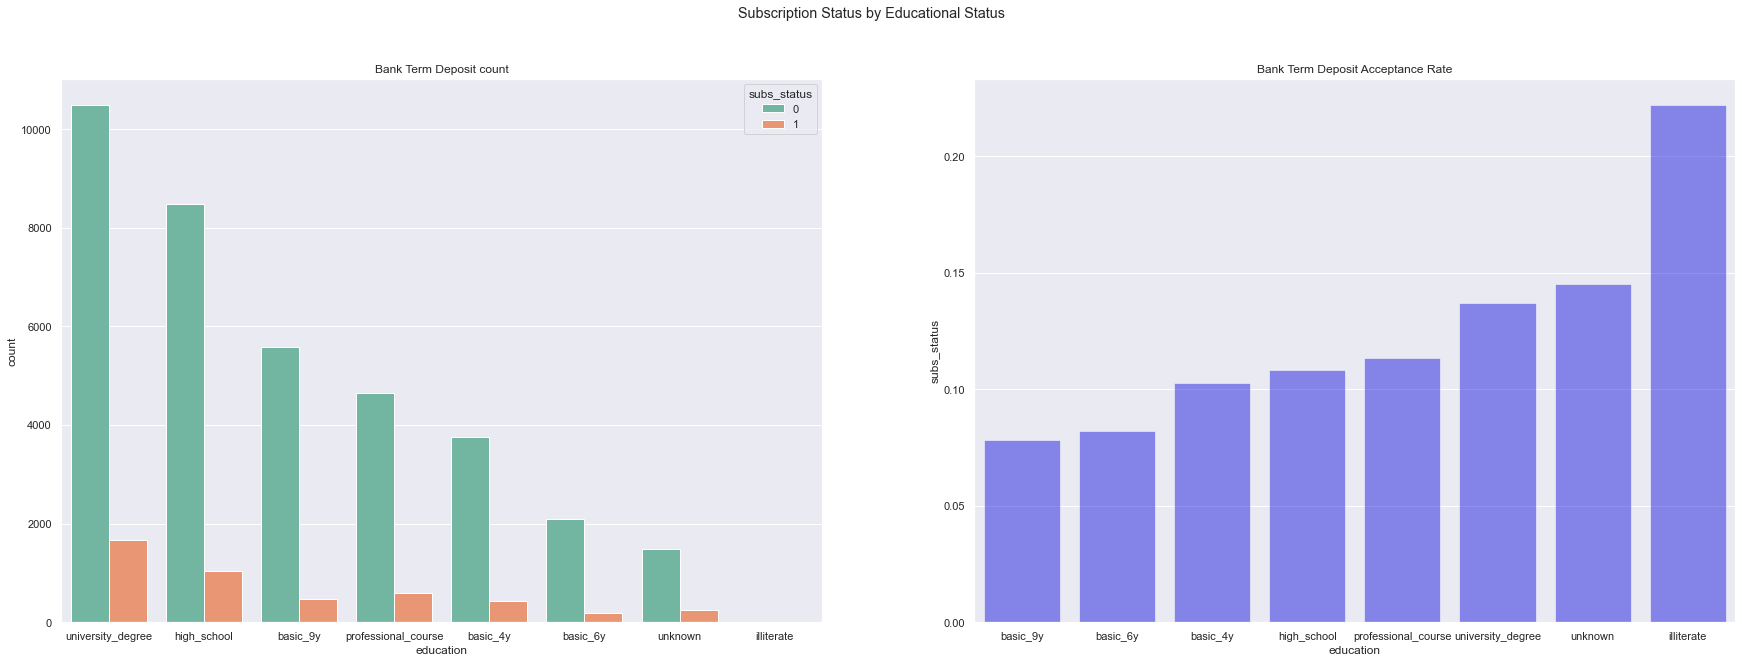

In [51]:
# Analysis by the `education` variable
fig, ax = plt.subplots(1,2, figsize=(30, 10))
plt.suptitle('Subscription Status by Educational Status')

sns.countplot(df['education'], hue=df['subs_status'], palette='Set2', order=df['education'].value_counts().index, ax=ax[0])
ax[0].set_title('Bank Term Deposit count')

graph = df.groupby('education')['subs_status'].mean().sort_values()
sns.barplot(x=graph.index, y=graph, color='blue', alpha=0.5, ax=ax[1])
ax[1].set_title('Bank Term Deposit Acceptance Rate')

plt.show()

Based on above graph, We can see that:
- Most frequent contacted clients are the clients that has `University_degree` and/or `high_school` education.
- In line with fact above, `university_degree`, `professional_course`, and `high_school` are client that accepted the subscription of `bank term deposit`.
- From graph on the right, I can extract the `education` ordinality according to the `subs_status` variable.

from previous process, I already generate `year` information, now I'll utilize it and see the trends over the time.

In [52]:
# make temporary dataframe.
_df = df.copy()

# Create new `date` variable
_df['date'] = pd.to_datetime(_df['year'].astype(str) + '-' + _df['month'].astype(str), format='%Y-%m')

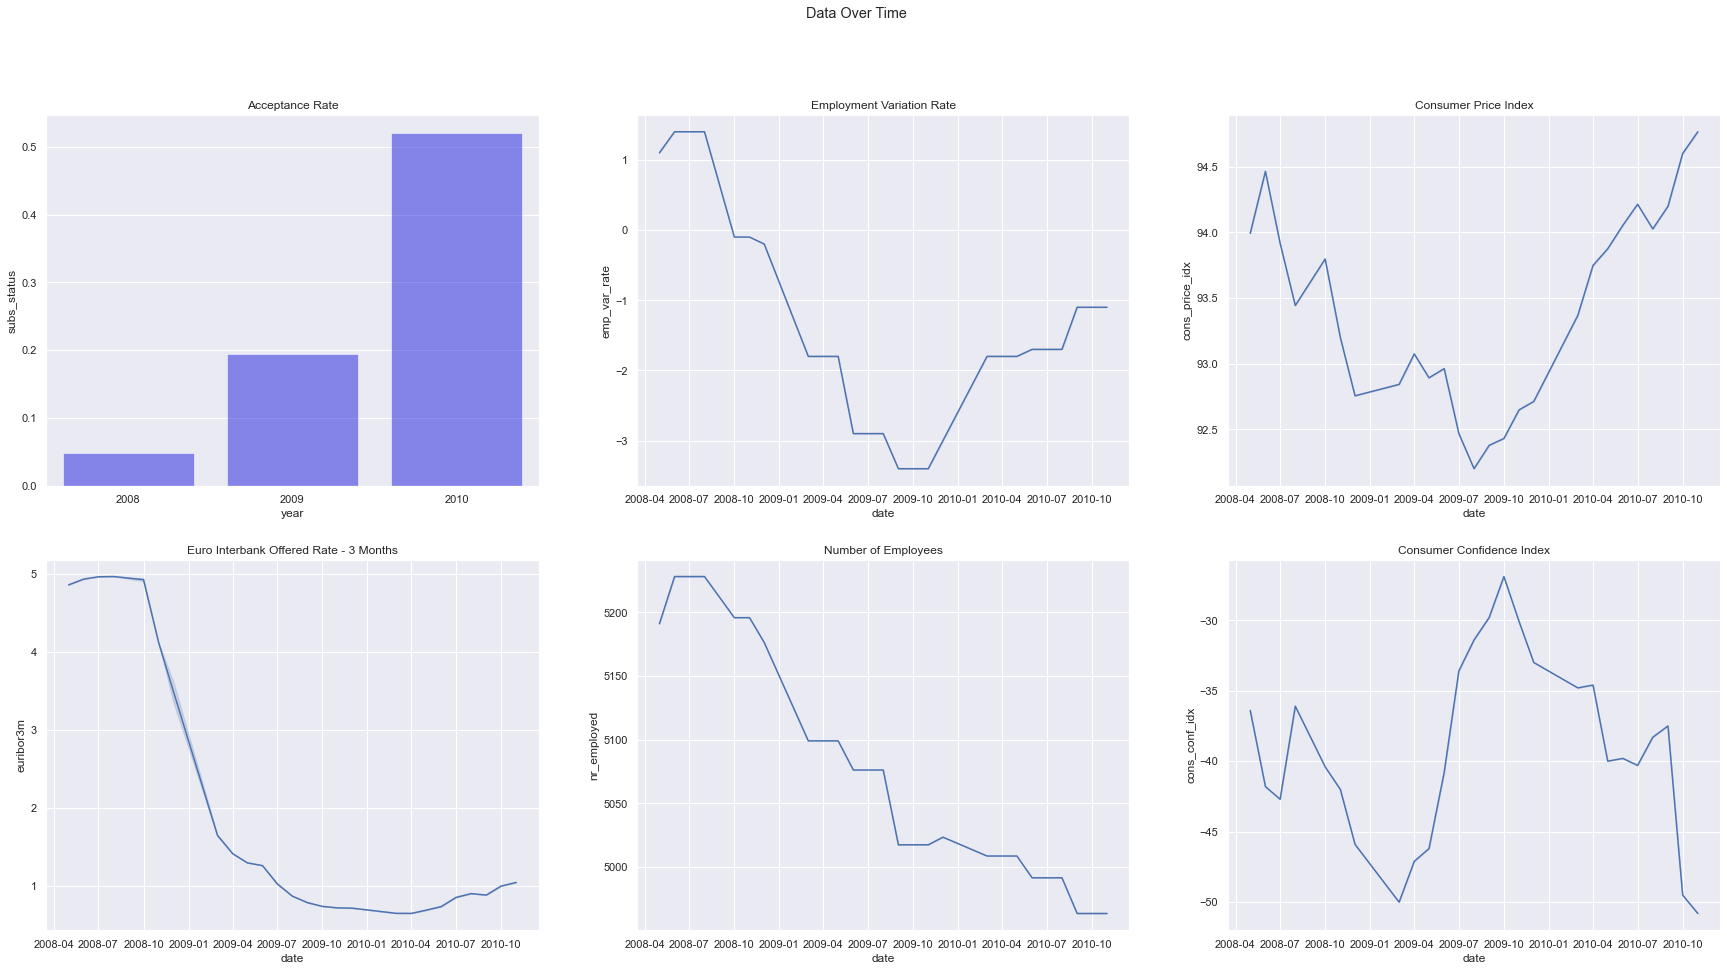

In [53]:
# Analysis by the `education` variable
fig, ax = plt.subplots(2,3, figsize=(30, 15))
plt.suptitle('Data Over Time')

graph = _df.groupby('year')['subs_status'].mean().sort_values()
sns.barplot(x=graph.index, y=graph, color='blue', alpha=0.5, ax=ax[0,0])
ax[0,0].set_title('Acceptance Rate')

sns.lineplot(data=_df, x='date', y='emp_var_rate', ax=ax[0,1])
ax[0,1].set_title('Employment Variation Rate')

sns.lineplot(data=_df, x='date', y='cons_price_idx', ax=ax[0,2])
ax[0,2].set_title('Consumer Price Index')

sns.lineplot(data=_df, x='date', y='euribor3m', ax=ax[1,0])
ax[1,0].set_title('Euro Interbank Offered Rate - 3 Months')

sns.lineplot(data=_df, x='date', y='nr_employed', ax=ax[1,1])
ax[1,1].set_title('Number of Employees')

sns.lineplot(data=_df, x='date', y='cons_conf_idx', ax=ax[1,2])
ax[1,2].set_title('Consumer Confidence Index')

plt.show()

From graph above, several information that we can get:
- Acceptance rate of `bank term deposit` gradually increase over the time.
- `Employment variation rate and consumer price index` has similar trends and both of them has inverse trends with `Consumer Confidence Index`.
- We can see as `euribor3m` decrease, the acceptance rate of `bank term deposit` is increasing.


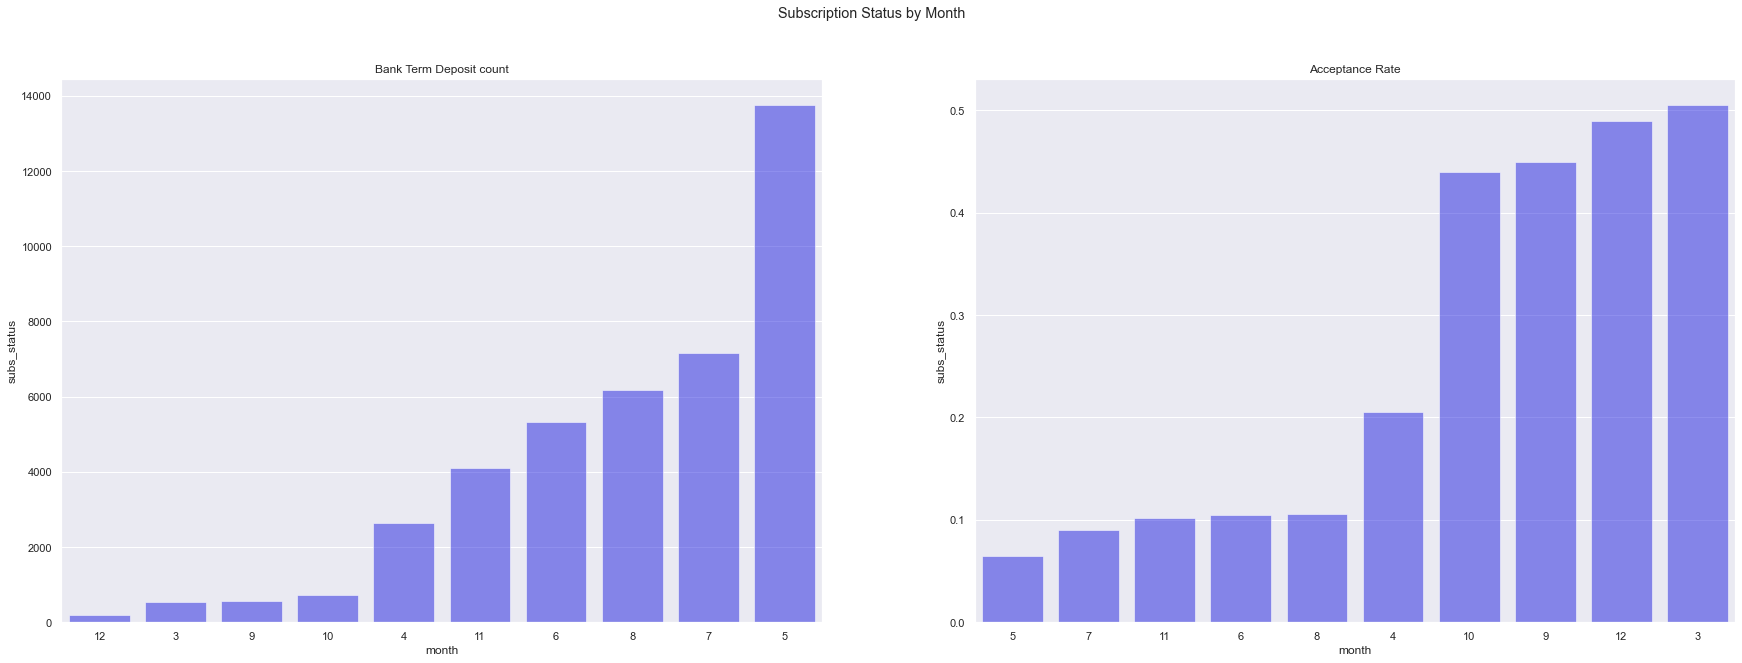

In [54]:
# Analysis by the `education` variable
fig, ax = plt.subplots(1,2, figsize=(30, 10))
plt.suptitle('Subscription Status by Month')

graph = df.groupby('month')['subs_status'].count().sort_values()
sns.barplot(x=graph.index, y=graph, order=graph.index, color='blue', alpha=0.5, ax=ax[0])
ax[0].set_title('Bank Term Deposit count')

graph = df.groupby('month')['subs_status'].mean().sort_values()
sns.barplot(x=graph.index, y=graph, order=graph.index, color='blue', alpha=0.5, ax=ax[1])
ax[1].set_title('Acceptance Rate')

plt.show()

From graph on the right, I can extract the `month` ordinality according to the `subs_status` variable.

### Multivariate  Analysis

In this part of sub-process, I will try to map the correlation between each input variable to the target variable. For this task I'll utilize the most common type of correlation coeffiecient which is `Pearson Correlation` and try to plot it in a graph.

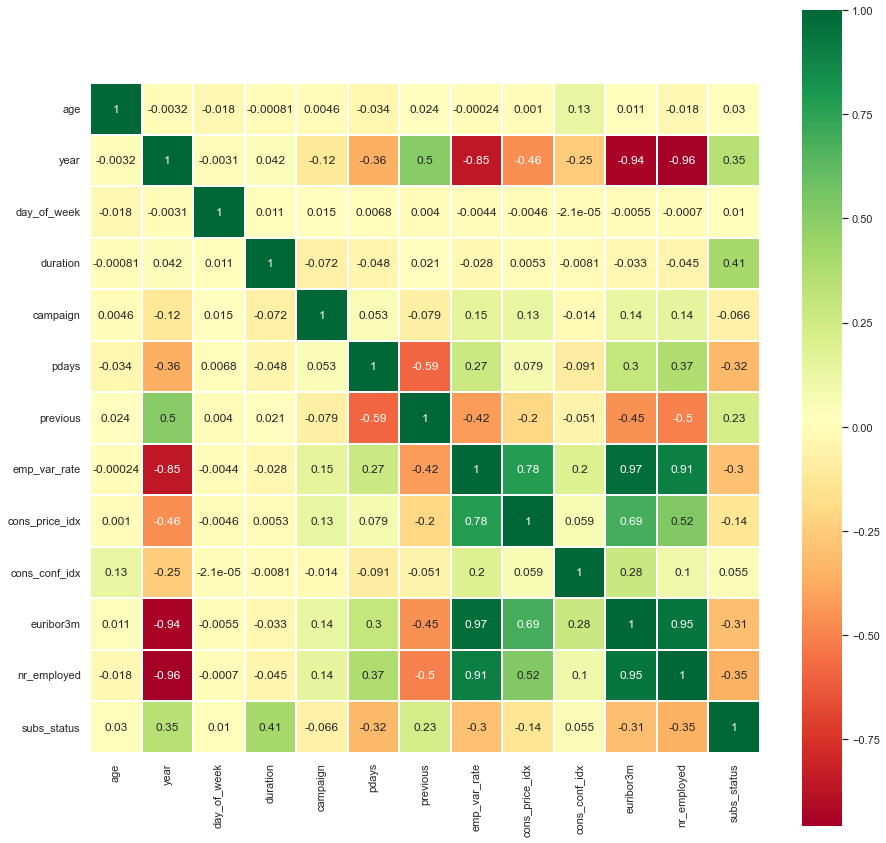

In [55]:
# Checking correlation between each variables

# Heatmap
corrmat = df.corr()
top_corr_feature = corrmat.index


plt.figure(figsize=(15,15))

g = sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap='RdYlGn', square=1, linewidths=0.05)

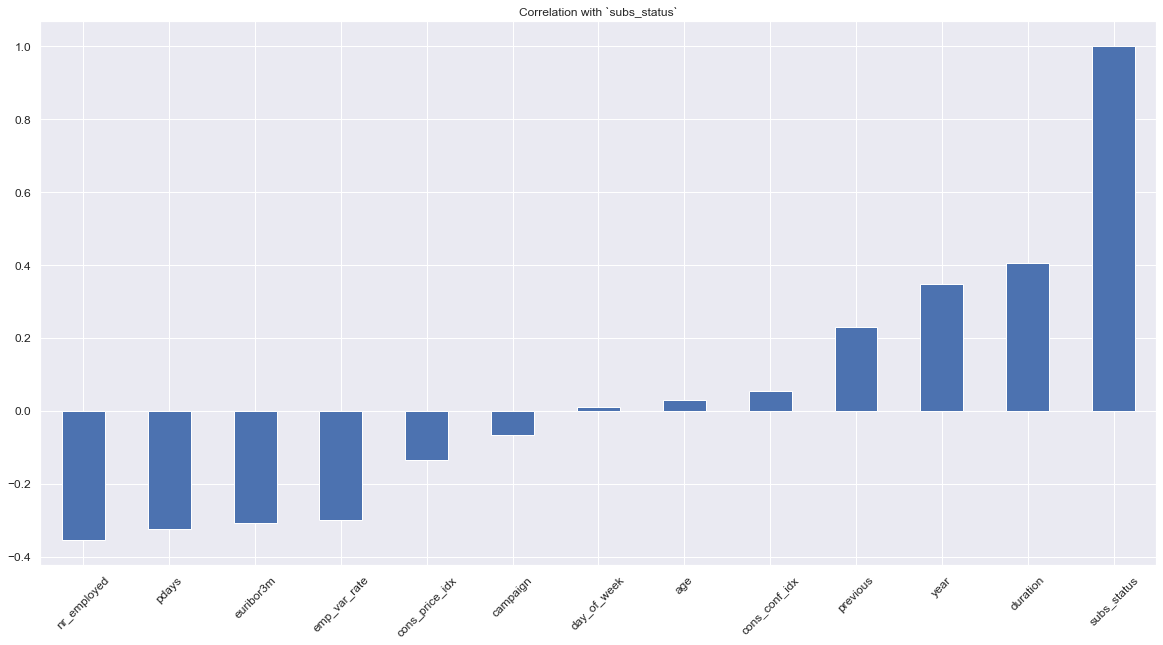

In [56]:
# Checking correlation between target variable and input variables

df.corrwith(df['subs_status']).sort_values().plot.bar(figsize=(20,10), title='Correlation with `subs_status`', fontsize=12, rot=45, grid=True)
plt.show()

Based on graph above, I can summarize top variable that correlate with `subs_status` target variable:

- top three negatively correlated : `nr_employed, pdays, euribor3m, emp_var_rate`
- top three positively correlated : `duration, year, and previous`

This correlation matrix is inline with `data over time` graph I made on the previous sub-process.

For reminder, We had information like this in the begining:
>this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

hence we will not focus on the `duration` variable.

### Cardinality Check

I'll run through `categorical` input parameter and check their `Cardinality`.

In [57]:
# Paramater Categorization

numerical_col = df.select_dtypes(include=np.number).columns.tolist()
categorical_col = df.select_dtypes(include=['object']).columns.tolist()

In [58]:
# Check unique value for each categorical variable

for i in categorical_col:
    print(i,"|", 'Cardinality count :', df[i].nunique())
    print(df[i].unique())
    print('_____'*20)

job | Cardinality count : 12
['housemaid' 'services' 'admin' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
____________________________________________________________________________________________________
marital | Cardinality count : 4
['married' 'single' 'divorced' 'unknown']
____________________________________________________________________________________________________
education | Cardinality count : 8
['basic_4y' 'high_school' 'basic_6y' 'basic_9y' 'professional_course'
 'unknown' 'university_degree' 'illiterate']
____________________________________________________________________________________________________
default | Cardinality count : 3
['no' 'unknown' 'yes']
____________________________________________________________________________________________________
housing | Cardinality count : 3
['no' 'yes' 'unknown']
_____________________________________________________________________________________

I think the cardinality for each categorical variable is not too big, so I'll just keep it as it is.

## V. Data Preprocessing

In this process I  split my dataset into `train, test, and inference` dataset.

### Dataset Splitting

In this process, I will split my dataset into three different set:
1. Inference Set : Will be used `as if` new instance that is taken from real population.
2. Train Set : Will be used to `train` the `machine learning` model.
3. Test Set : Will be used to `test` the `machine learning` model.

I will take `16` sample for `Inference Set` and then:
1. Take 70% from reamining-dataset for `Train Set`
2. Take 30% from reamining-dataset for `Test Set`

all of those entries will be randomly selected from the dataset.

In [59]:
#Set Random State
random_state = 42

In [60]:
# Inference Set Preparation

inf_set = df.sample(16, random_state=random_state)
inf_set.shape

(16, 22)

In [61]:
# Exclude Inference Set from main dataset
train_test_set = df.drop(inf_set.index)
train_test_set.reset_index(drop=True, inplace=True)

train_test_set.shape

(41160, 22)

In [62]:
# Splitting Dataset

# X will be consist of input parameter only
X = train_test_set.drop(['subs_status'], axis=1)

# y will be consist of target parameter only
y = train_test_set['subs_status']

In [63]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state, stratify=y)

In [64]:
# Size Summary

print('Train Set shape : ', X_train.shape)
print('Test Set shape : ', X_test.shape)
print('Inference Set shape : ', inf_set.shape)

Train Set shape :  (28812, 21)
Test Set shape :  (12348, 21)
Inference Set shape :  (16, 22)


### Outliers Detection

In this sub-process, I will try to identify any outliers inside each `numerical` input variables.

- First, I'll check the distribution of each variable, using skewness value. Any skewness value outside `-0.5 to 0.5` will be considered as `Skewed Distribution`, while any skewness value inside `-0.5 to 0.5` will be considered as `Normal Distribution`.
- Second, I'll count how many outliers there in each variable. For `Normal Distribution`, I'll use `Z-score` to determine the outliers threshold. For `Skewed Distribution`, I'll use `IQR` to determine the outliers threshold.
- Third Summarize all the information above.

In [65]:
# column categorization
def col_categorization(df):
    global X_train_num, X_train_cat
    X_train_num = df.select_dtypes(include=np.number)
    X_train_cat = df.select_dtypes(include=['object'])
    print("Generate 'X_train_num' and 'X_train_cat'")

# column categorization
col_categorization(X_train)

Generate 'X_train_num' and 'X_train_cat'


In [66]:
# create function to detect outliers based on distribution
def detect_outliers(df, k=1.5):
    #create dataframe with columns name : feature, distribution, outlier
    global df_outliers
    df_outliers = pd.DataFrame(columns=['col_name','distribution','bottom_limit', 'upper_limit', 'left_tail','right_tail','outliers_count','percentage'])
    #create loop for each feature
    for i in range(len(df.columns)):
        #create if statement for each distribution
        if df.iloc[:,i].skew() > -0.5 and df.iloc[:,i].skew() < 0.5 :
            #count outlier for normal distribution based on z-score
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'normal', # distribution,
                                round(stats.zscore(df.iloc[:,i]).min()), # bottom limit
                                round(stats.zscore(df.iloc[:,i]).max()), # upper limit
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))<-3].count(), # left_tail
                                df.iloc[:,i][(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # right_tail
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count(), # outliers_count
                                df.iloc[:,i][abs(stats.zscore(df.iloc[:,i],nan_policy='omit'))>3].count()/len(df.iloc[:,i])*100] # percentage
        else:
            #count outlier for skew distribution based on IQR
            Q1 = df.iloc[:,i].quantile(0.25)
            Q3 = df.iloc[:,i].quantile(0.75)
            IQR = Q3 - Q1
            df_outliers.loc[i] = [df.columns[i], # col_name
                                'skew', # distribution,
                                Q1-k*IQR, # bottom limit
                                Q1+k*IQR, # upper limit
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))].count(), # left_tail
                                df.iloc[:,i][(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # right_tail
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count(), # outliers_count
                                df.iloc[:,i][(df.iloc[:,i]<(Q1-1.5*IQR))|(df.iloc[:,i]>(Q3+1.5*IQR))].count()/len(df.iloc[:,i])*100] # percentage
    print('Generate df_outliers')


In [67]:
# Outliers Summary
detect_outliers(X_train_num)
df_outliers.sort_values(by='percentage',ascending=False)

Generate df_outliers


,col_name,distribution,bottom_limit,upper_limit,left_tail,right_tail,outliers_count,percentage
6,previous,skew,0.0000,0.0000,0,3921,3921,13.608913
3,duration,skew,-225.0000,429.0000,0,2018,2018,7.004026
4,campaign,skew,-2.0000,4.0000,0,1678,1678,5.823962
5,pdays,skew,999.0000,999.0000,1102,0,1102,3.824795
0,age,skew,9.5000,54.5000,0,323,323,1.121061
1,year,skew,2006.5000,2009.5000,0,0,0,0.000000
2,day_of_week,normal,-1.0000,1.0000,0,0,0,0.000000
7,emp_var_rate,skew,-6.6000,3.0000,0,0,0,0.000000
8,cons_price_idx,normal,-2.0000,2.0000,0,0,0,0.000000
9,cons_conf_idx,normal,-2.0000,3.0000,0,0,0,0.000000


From result above, We can see that there is 5 variable that is `skew distributed` and has `outliers` in it. Let's check it out one by one first.

In [68]:
# Outliers Check
# Variable : previous
# Description : number of contacts performed before this campaign and for this client (numeric)
print(X_train_num.previous.describe())
print()
print(X_train_num.previous.value_counts())

count    28812.000000
mean         0.173608
std          0.499891
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

0    24891
1     3164
2      527
3      162
4       49
5       13
6        5
7        1
Name: previous, dtype: int64


From result above, the majority of the client is has not been contacted yet, it is shown in `quantiles values` which shows 0 values.\
For this case I'll just assume that all client is has not been contacted yet, Hence I'll cap all the values to 0.

In [69]:
# Outliers Check
# Variable : duration
# Description : last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').
print(X_train_num.duration.describe())
print()
print(X_train_num.duration.value_counts())

count    28812.000000
mean       257.699188
std        256.655056
min          0.000000
25%        102.000000
50%        180.000000
75%        320.000000
max       4918.000000
Name: duration, dtype: float64

85      121
73      119
90      118
97      117
72      115
       ... 
1127      1
859       1
1220      1
2025      1
1150      1
Name: duration, Length: 1415, dtype: int64


In [70]:
# Outliers Check
# Variable : campaign
# Description : number of contacts performed during this campaign and for this client (numeric, includes last contact)
print(X_train_num.campaign.describe())
print()
print(X_train_num.campaign.value_counts())

count    28812.000000
mean         2.564869
std          2.745077
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

1     12351
2      7378
3      3735
4      1830
5      1144
6       696
7       429
8       281
9       208
10      159
11      122
12       84
13       67
14       53
17       40
16       36
15       34
18       25
21       22
20       17
19       15
24       13
22        9
27        9
23        9
28        6
26        6
25        6
31        6
29        5
30        3
35        3
42        2
32        2
34        2
37        1
56        1
41        1
43        1
39        1
Name: campaign, dtype: int64


For `Campaign` variable, because it has outliers between 5% to 15%, I'll cap the values.

In [71]:
# Outliers Check
# Variable : pdays
# Description : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
print(X_train_num.pdays.describe())
print()
print(X_train_num.pdays.value_counts())
print()
print(X_train[X_train['pdays']==999].shape)
print(X_train[X_train['pdays']!=999].shape)

count    28812.000000
mean       961.021102
std        190.449936
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

999    27710
3        314
6        297
4         89
2         51
9         45
12        45
5         39
7         37
10        35
13        25
11        20
1         19
15        18
14        15
8         13
16         9
0          9
17         8
18         5
19         2
22         2
27         1
25         1
26         1
20         1
21         1
Name: pdays, dtype: int64

(27710, 21)
(1102, 21)


the `999` values skew the distribution so much, there is a lot of people that has not been contacted yet. In my opinion, this variable share the similiar meaning with `previous`, so I decide not to use this variable and use `previous` to represent client who has not contacted yet.

In [72]:
# Outliers Check
# Variable : age
# Description : client's age
print(X_train_num.age.describe())
print()
print(X_train_num.age.value_counts())

count    28812.000000
mean        40.007289
std         10.447514
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

31    1342
33    1307
32    1291
34    1236
36    1224
      ... 
92       3
89       2
91       1
98       1
95       1
Name: age, Length: 76, dtype: int64


Since the `age` variable has low outliers percentage, I'll just let te outliers be.\

So here is the conclusion, I will:
- Cap `previous` variable
- Let the `duration` variable be because it won't be used
- Cap `campaign` variable
- Let the `pdays` variable be because it won't be used
- Let the `age` variable be becaause it has low outliers percentage

Now let's handle it

In [73]:
#create function to handling outliers
def handling_outliers(exception_list):
   global X_train,y_train, norm_under_5, norm_5to15, skew_under_5, skew_5to15
   exception_list = exception_list

   norm_under_5 = df_outliers[df_outliers['distribution']=='normal'][df_outliers['percentage']<5]['col_name'].tolist()
   norm_5to15 = df_outliers[df_outliers['distribution']=='normal'][df_outliers['percentage']>5]['col_name'].tolist()
   skew_under_5 = df_outliers[df_outliers['distribution']=='skew'][df_outliers['percentage']<5]['col_name'].tolist()
   skew_5to15 = df_outliers[df_outliers['distribution']=='skew'][df_outliers['percentage']>5]['col_name'].tolist() 

   norm_under_5 = [x for x in norm_under_5 if x not in exception_list]
   norm_5to15 = [x for x in norm_5to15 if x not in exception_list]
   skew_under_5 = [x for x in skew_under_5 if x not in exception_list]
   skew_5to15 = [x for x in skew_5to15 if x not in exception_list]


   custom_list = ['norm_under_5','norm_over_5','skew_under_5','skew_over_5']

   for i in custom_list: 
      if i == 'norm_under_5' and len(norm_under_5)!= 0:
         
         trim_norm = OutlierTrimmer(capping_method='gaussian',
                                    tail='both', # left/right/both
                                    fold=3, # for gaussian 2 or 3
                                    variables=norm_under_5,
                                    missing_values='ignore')    
         trim_norm.fit(X_train)

         df = trim_norm.transform(X_train)
         
         #intersection of y_train and X_train index location
         y_train = y_train.loc[y_train.index.intersection(X_train.index)]

      elif i == 'norm_over_5' and len(norm_5to15)!= 0:

         winsorizer_norm = Winsorizer(capping_method='gaussian',
                                    tail='both', # left/right/both
                                    fold=3, # for gaussian 2 or 3
                                    variables=norm_5to15,
                                    missing_values='ignore')    
         winsorizer_norm.fit(X_train)

         X_train = winsorizer_norm.transform(X_train)
       
   
      elif i == 'skew_under_5'and len(skew_under_5)!= 0:
         
         trim_skew = OutlierTrimmer(capping_method='iqr',
                                    tail='both', # left/right/both
                                    fold=1.5, # for iqr 1 or 2
                                    variables=skew_under_5,
                                    missing_values='ignore')    
         trim_skew.fit(X_train)

         X_train = trim_skew.transform(X_train)

         #intersection of y_train and X_train
         y_train = y_train.loc[y_train.index.intersection(X_train.index)]
   
      elif i == 'skew_over_5' and len(skew_5to15)!= 0:

         winsorizer_skew = Winsorizer(capping_method='iqr',
                                    tail='both', # left/right/both
                                    fold=1.5, # for iqr 1 or 2
                                    variables=skew_5to15,
                                    missing_values='ignore')    
         winsorizer_skew.fit(X_train)

         X_train = winsorizer_skew.transform(X_train)

In [74]:
# Outliers Handling Summary
print('X_train Before', X_train.shape)
print('y_train Before', y_train.shape)
handling_outliers(exception_list=['pdays', 'duration', 'age'])
print('X_train After', X_train.shape)
print('y_train After', y_train.shape)

X_train Before (28812, 21)
y_train Before (28812,)
X_train After (28812, 21)
y_train After (28812,)


### Missing Value Detection

In this sub-process, I will handle any missing value inside the dataset. Let's check the missing value in each parameter.

In [75]:
# create function to detect missing values

def detect_missval(df):
    global df_missval
    df_missval = pd.DataFrame(columns=['col_name','missing_count','missing_percentage'])
    for i in range(len(df.columns)):
        if df.iloc[:,i].isnull().sum() != 0:
            df_missval.loc[i] = [df.columns[i], # col_name
                                df.iloc[:,i].isnull().sum(), # missing_count
                                df.iloc[:,i].isnull().sum()/len(df.iloc[:,i])*100] # missing_percentage
    print('Generate df_missval')
    return df_missval

In [76]:
# Missing Value check
# X_train Set
detect_missval(X_train)

Generate df_missval


,col_name,missing_count,missing_percentage


In [77]:
# Missing Value check
# X_test Set
detect_missval(X_test)

Generate df_missval


,col_name,missing_count,missing_percentage


From results above, I can condlude that the dataset is free from any missing value.

### Feature Selection

In this part of sub-process, I will select input variable that will be used in `subs_status` prediction model.

Let's see our dataset.

In [78]:
# Dataset Check
X_train.head()

,age,job,marital,education,default,housing,loan,contact,year,month,...,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
18478,39,technician,married,high_school,no,yes,no,cellular,2008,7,...,123,3.0,999,0.0,nonexistent,1.4,93.918,-42.7,4.968,5228.1
32369,32,technician,married,professional_course,no,no,no,cellular,2009,5,...,158,2.0,999,0.0,failure,-1.8,92.893,-46.2,1.313,5099.1
828,45,blue-collar,married,basic_9y,unknown,yes,yes,telephone,2008,5,...,207,1.0,999,0.0,nonexistent,1.1,93.994,-36.4,4.856,5191.0
31948,48,blue-collar,married,professional_course,no,no,yes,cellular,2009,5,...,291,2.0,999,0.0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1
8140,49,services,married,high_school,unknown,yes,no,telephone,2008,6,...,86,5.0,999,0.0,nonexistent,1.4,94.465,-41.8,4.864,5228.1


And once again let's see the correlation matrix between each parameter

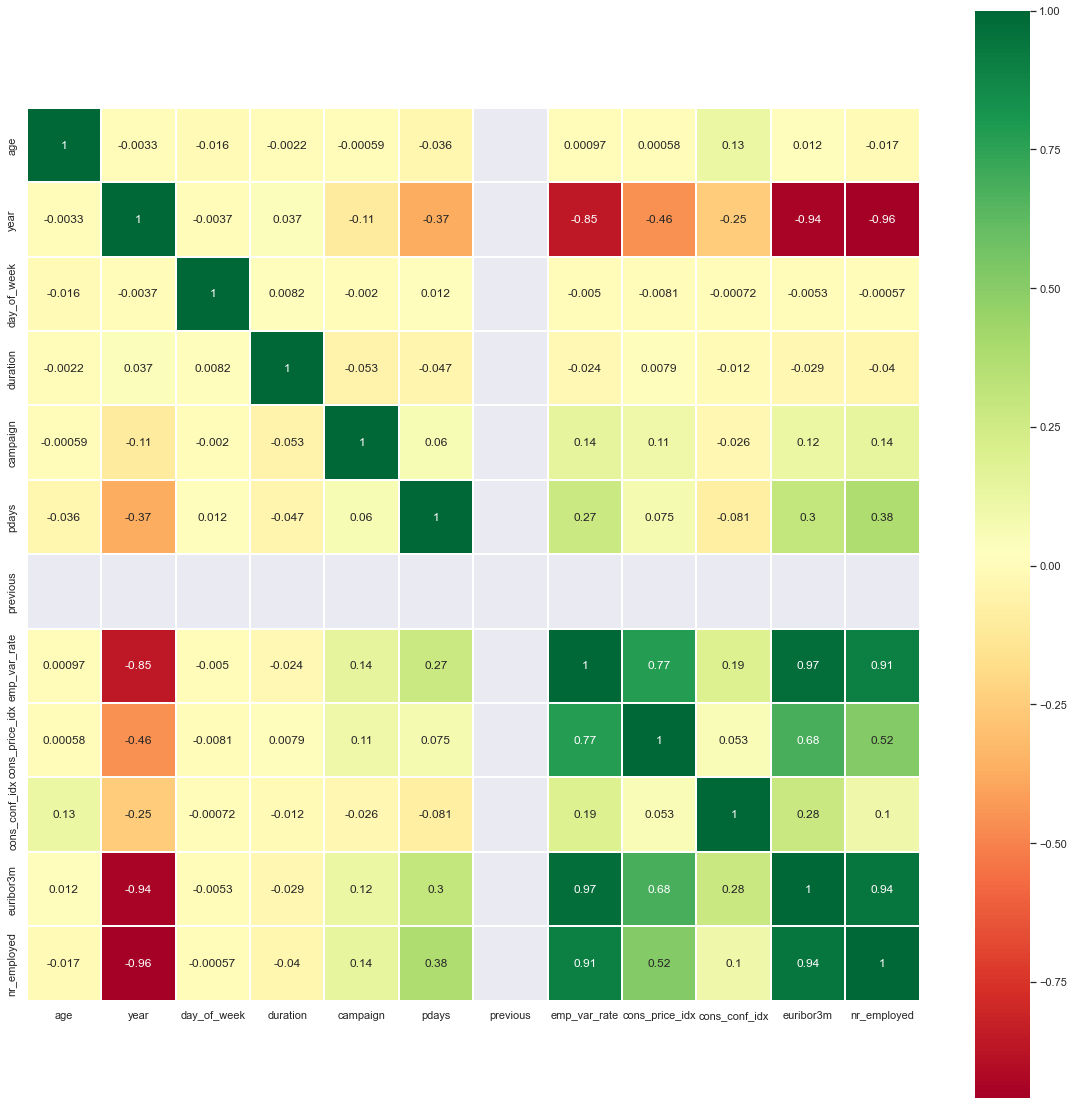

In [79]:
# Checking correlation between each parameter

# Heatmap
corrmat = X_train.corr()
top_corr_feature = corrmat.index

plt.figure(figsize=(20,20))

g = sns.heatmap(X_train[top_corr_feature].corr(), annot=True, cmap='RdYlGn', square=1, linewidths=0.05)

In this correlation matrix, every correlation between each feature are calculated. The result will be vary from `-1 to 1`, in which:
- Any value that getting closer to 1 represent strong positive correlation (symbolized with green color)
- Any value that getting closer to -1 represent strong negative correlation (symbolized with red color)
- Middle value will be 0 that represent neutral correlation (symbolized with yellow color)

And here is conclusion that I made:
- `year` shows very high negative correlation with `nr_employed, euribor3m, emp_var_rate` and high positive correlation with `previous`
- `emp_var_rate` shows very high positive correlation with `euribor3m` and `nr_employed`

Since high correlation means that variables is not really independent, I'll try to remove those variables.

Here is what I gonna do:
- Drop `year`, due to its very high-correlation with `nr_employed, euribor3m, emp_var_rate`
- Choose `euriobr3m` over `emp_var_rate` and `nr_employed` 
- Drop `previous` because it has 0 variance.

Also I'll drop these input variables:
- Drop `duration` becaues of the **notes: this attribute highly affects the output target (e.g., if duration=0 then y='no')**
- Drop `pdays` because it has lots of `999` values as explained from data outliers process above

The Final model would be:

- Target Variable : `subs_status`
- Input Variable : [`'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'poutcome', 'cons_price_idx','cons_conf_idx', 'euribor3m'`]

### Feature Engineering (Scaling/Encoding)

In this part of sub-process, I will make the pipeline for data preparation process.\
This process consist of `Scaling and Encoding` input variables so that it can be processed by the model.

Before start the process, I'll categorize each input variable into three different type:
- Category_Ordinal : [`'job', 'marital', 'education', 'month'`]
- Category_Nominal : [`'default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome'`]
- Numerical : [`'age', 'campaign','cons.price.idx', 'cons.conf.idx', 'euribor3m'`]

And then, I'll do:
- `Ordinal Encoding` for `Category_Ordinal`
- `One Hot Encoding` for `Category_Nominal`
- `Standard Scaling` for `Numerical`

In [80]:
# Column Categorization
Cat_ordinal = ['job', 'marital', 'education', 'month']
Cat_nominal = ['default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']
Num = ['age', 'campaign','cons_price_idx', 'cons_conf_idx', 'euribor3m']

# Combines three categoy into one
final_features = Cat_ordinal + Cat_nominal + Num

In [81]:
# Use selected variables
X_train = X_train[final_features]
X_test = X_test[final_features]

In [82]:
# Ordinal Encode Order List

job_order = OrdinalEncoder(categories=[['blue-collar', 'services', 'entrepreneur', 'housemaid', 'self-employed', 'technician', 'unknown', 'management', 'admin', 'unemployed', 'retired', 'student']])
marital_order = OrdinalEncoder(categories=[['married', 'divorced', 'single', 'unknown']])
education_order = OrdinalEncoder(categories=[['basic_9y', 'basic_6y', 'basic_4y', 'high_school', 'professional_course', 'university_degree','unknown', 'illiterate']])
month_order =  OrdinalEncoder(categories=[[5, 7, 11, 6, 8, 4, 10, 9, 12, 3]])

In [83]:
# Make the Feature Engineering Pipeline
pipe_FE = ColumnTransformer([
    ('job', job_order,['job']),
    ('marital', marital_order,['marital']),
    ('education', education_order,['education']),
    ('month', month_order,['month']),
    ('OHE', OneHotEncoder(),['default', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']),
    ('StdScaler', StandardScaler(),['age', 'campaign', 'cons_price_idx', 'cons_conf_idx', 'euribor3m'])
])  

## VI. Model Definition

### Model
Here is my initial `subs_status` prediction model:

- Target Variable : `subs_status`
- Input Variable : [`'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'previous', 'poutcome', 'cons_price_idx','cons_conf_idx', 'euribor3m'`]

This is only initial model, it may change in the future depends on my model evaluation result.


### Algortihm
In this project I will try several `Supervised Learning` Algorithm, that is:
- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- KNN
- Naive Bayes
- AdaBoost

I will find from above model, which one is the best.


### Model Evaluation (Metrics)

Since the target of this project is `classification`, I will use these error metrics for evaluating my model:
- F1 Score
- ROC-AUC Score

### Logistic Regression

In [84]:
# Initial Model
Logreg = LogisticRegression(n_jobs=-1, random_state=random_state)

# Model Pipeline
pipe_Logreg = Pipeline([
    ('preprocessing', pipe_FE),
    ('Logreg', Logreg)
])

# Hyper parameter
params_Logreg = {
    'Logreg__C': [0.001, 0.1, 1, 10, 100, 1000],
    'Logreg__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

### Support Vector Machine - SVC

In [85]:
# Initial Model
Lin_SVC = SVC(cache_size=2000, random_state=random_state)

# Model Pipeline
pipe_Lin_SVC = Pipeline([
    ('preprocessing', pipe_FE),
    ('Lin_SVC', Lin_SVC)
])

# Hyper parameter
params_Lin_SVC = {
    'Lin_SVC__C': [0.25, 0.5, 0.75, 1],
    'Lin_SVC__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'Lin_SVC__gamma': ['auto', 'scale']
}

### Decision Tree

In [86]:
# Initial Model
DT = DecisionTreeClassifier(random_state=random_state)

# Model Pipeline
pipe_DT = Pipeline([
    ('preprocessing', pipe_FE),
    ('DT', DT)
])

# Hyper parameter
params_DT = {
    'DT__criterion': ['gini', 'entropy'],
    'DT__max_depth': [None, 8, 16, 32],
    'DT__min_samples_split': [2, 4, 8, 16, 32, 64]
}

### Random Forest

In [87]:
# Initial Model
RF = RandomForestClassifier(random_state=random_state, n_jobs=-1, verbose=1)

# Model Pipeline
pipe_RF = Pipeline([
    ('preprocessing', pipe_FE),
    ('RF', RF)
])

# Hyper parameter
params_RF = {
    'RF__criterion': ['gini', 'entropy'],
    'RF__min_samples_split': [2, 4, 8, 16, 32, 64],
    'RF__max_features': ['auto', 'sqrt', 'log2']
}

### KNN

In [88]:
# Initial Model
KNN = KNeighborsClassifier(n_jobs=-1)

# Model Pipeline
pipe_KNN = Pipeline([
    ('preprocessing', pipe_FE),
    ('KNN', KNN)
])

# Hyper parameter
params_KNN = {
    'KNN__n_neighbors': [5, 7, 9, 30],
    'KNN__weights': ['uniform', 'distance'],
    'KNN__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

### Naive Bayes

In [89]:
# Initial Model
NB = GaussianNB()

# Model Pipeline
pipe_NB = Pipeline([
    ('preprocessing', pipe_FE),
    ('NB', NB)
])

# Hyper parameter
params_NB = {
    'NB__var_smoothing': [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1, 10, 100, 1000, 10000]
}

### AdaBoost

In [90]:
# Initial Model
Ada = AdaBoostClassifier(random_state=random_state)

# Model Pipeline
pipe_Ada = Pipeline([
    ('preprocessing', pipe_FE),
    ('Ada', Ada)
])

# Hyper parameter
params_Ada = {
    'Ada__n_estimators': [10, 50, 100, 200, 500],
    'Ada__learning_rate': [0.1, 0.5, 1, 10, 50, 100],
    'Ada__algorithm': ['SAMME', 'SAMME.R']
}

## VII. Model Training

### Cross-Validation Process

In this part of sub-process, I will use `Cross-Validation` to evaluate my base model and find which one is the best.

In [91]:
# Cross-validate base model

# prepare models and put it into list
models = []
models.append(('Logreg', pipe_Logreg))
models.append(('Lin_SVC', pipe_Lin_SVC))
models.append(('DT', pipe_DT))
models.append(('RF', pipe_RF))
models.append(('KNN', pipe_KNN))
models.append(('NB', pipe_NB))
models.append(('Ada', pipe_Ada))

# Create empty list to stores result
names = []
results = []
mean_score = []
stdev_score = []

# Cross-validate each model
for name, model in models:
    model.fit(X_train,y_train)
    scores = cross_val_score(model, X_train, y_train, scoring='f1_weighted', cv=5, n_jobs=-1)

    names.append(name)
    results.append(scores)
    mean_score.append(round(np.mean(scores),4))
    stdev_score.append(round(np.std(scores),4))

cv_result = pd.DataFrame({'models':names, 'mean_score':mean_score, 'stdev_score':stdev_score})

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished


## VIII. Model Evaluation

In this part of process, I will try to evaluate the trained model and make conclusion out of it.

In [92]:
# Showing the result
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
6,Ada,0.8772,0.0011
3,RF,0.8769,0.0013
0,Logreg,0.8746,0.0012
4,KNN,0.8703,0.0042
1,Lin_SVC,0.8701,0.0012
2,DT,0.8396,0.0025
5,NB,0.6637,0.0057


Based on result above, we can see the top model is `AdaBoost`, it has the best `mean_score` and lowest `std_score`.
Actually, in my opinion our base model actually perform pretty good, they had similar mean score with low standard deviation score, this indicate those model is `precision and accurate enough.`\
The most under performed model in this case is only `Naive Bayes` model.

I decided to chose the top three performing model and do the hyper parameter tuning for each of them.

### Hyper Parameter Tuning for the Best Model - AdaBoost

In [93]:
# Hyperparameter tuning
grid_Ada = GridSearchCV(
    pipe_Ada, params_Ada, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_Ada = grid_Ada.best_params_
best_pipe_Ada = grid_Ada.best_estimator_
df_result_Ada = pd.DataFrame.from_dict(grid_Ada.cv_results_, orient='columns')

Fitting 5 folds for each of 60 candidates, totalling 300 fits


In [94]:
# Show best parameter for Model
best_params_Ada

{'Ada__algorithm': 'SAMME.R',
 'Ada__learning_rate': 1,
 'Ada__n_estimators': 200}

Based on result above, the best hyper parameter setting for `AdaBoost` are:
- algorithm: `SAMME.R`
- learning_rate: `1`
- n_estimators: `200`

### Hyper Parameter Tuning for the Best Model - Random Forest

In [95]:
# Hyperparameter tuning
grid_RF = GridSearchCV(
    pipe_RF, params_RF, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_RF = grid_RF.best_params_
best_pipe_RF = grid_RF.best_estimator_
df_result_RF = pd.DataFrame.from_dict(grid_RF.cv_results_, orient='columns')

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [96]:
# Show best parameter for Model
best_params_RF

{'RF__criterion': 'gini',
 'RF__max_features': 'auto',
 'RF__min_samples_split': 8}

Based on result above, the best hyper parameter setting for `Random Forest` are:
- criterion: `gini`
- min_samples_split: `auto`
- max_features: `8`

### Hyper Parameter Tuning for the Best Model - Logistic Regression

In [97]:
# Hyperparameter tuning
grid_Logreg = GridSearchCV(
    pipe_Logreg, params_Logreg, cv=5, scoring='f1_weighted', n_jobs=-1, verbose=1
).fit(X_train, y_train)

best_params_Logreg = grid_Logreg.best_params_
best_pipe_Logreg = grid_Logreg.best_estimator_
df_result_Logreg = pd.DataFrame.from_dict(grid_Logreg.cv_results_, orient='columns')

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [98]:
# Show best parameter for Model
best_params_Logreg

{'Logreg__C': 100, 'Logreg__solver': 'liblinear'}

Based on result above, the best hyper parameter setting for `Logistic Regression` are:
- C: `100`
- solver: `liblinear`

### Model Evaluation - AdaBoost

In [99]:
#Performance Metrics
print('==================== Train Results (AdaBoost) ====================')
print(classification_report(y_train, best_pipe_Ada.predict(X_train), target_names=['Not Subscribed', 'Subscribed']))

print('==================== Test Results (AdaBoost) ====================')
print(classification_report(y_test, best_pipe_Ada.predict(X_test), target_names=['Not Subscribed', 'Subscribed']))

==================== Train Results (AdaBoost) ====================
                precision    recall  f1-score   support

Not Subscribed       0.91      0.99      0.95     25566
    Subscribed       0.68      0.23      0.35      3246

      accuracy                           0.90     28812
     macro avg       0.80      0.61      0.65     28812
  weighted avg       0.88      0.90      0.88     28812

==================== Test Results (AdaBoost) ====================
                precision    recall  f1-score   support

Not Subscribed       0.91      0.99      0.95     10957
    Subscribed       0.67      0.21      0.32      1391

      accuracy                           0.90     12348
     macro avg       0.79      0.60      0.63     12348
  weighted avg       0.88      0.90      0.88     12348



In [100]:
#Performance Metrics
print('==================== Train Results (AdaBoost) ====================')
print(roc_auc_score(y_train, best_pipe_Ada.predict(X_train)))

print('==================== Test Results (AdaBoost) ====================')
print(roc_auc_score(y_test, best_pipe_Ada.predict(X_test)))

==================== Train Results (AdaBoost) ====================
0.6087013308890057
==================== Test Results (AdaBoost) ====================
0.599016959768291


**Performance Summary - AdaBoost**

Based on result above, I can say that 
- The model performance is not significantly different between training phase and test phase. This can be seen from the F1-Score that did not change much. I can assume that the model is `good fit.`
- Although the model is `good fit`, the model has tendency to predict relatively well on class `0` compared to class `1`. This can be seen from the F1-Score of each class that is around 0.9 and 0.3 respectively.
- Based from diferences between `ROC-AUC Score`, I can say that the model is `good fit.`

### Model Evaluation - Random Forest

In [101]:
#Performance Metrics
print('==================== Train Results (Random Forest) ====================')
print(classification_report(y_train, best_pipe_RF.predict(X_train), target_names=['Not Subscribed', 'Subscribed']))

print('==================== Test Results (Random Forest) ====================')
print(classification_report(y_test, best_pipe_RF.predict(X_test), target_names=['Not Subscribed', 'Subscribed']))

==================== Train Results (Random Forest) ====================
                precision    recall  f1-score   support

Not Subscribed       0.94      1.00      0.97     25566
    Subscribed       0.93      0.49      0.64      3246

      accuracy                           0.94     28812
     macro avg       0.93      0.74      0.81     28812
  weighted avg       0.94      0.94      0.93     28812

==================== Test Results (Random Forest) ====================


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


                precision    recall  f1-score   support

Not Subscribed       0.91      0.98      0.95     10957
    Subscribed       0.63      0.27      0.37      1391

      accuracy                           0.90     12348
     macro avg       0.77      0.62      0.66     12348
  weighted avg       0.88      0.90      0.88     12348



In [102]:
#Performance Metrics
print('==================== Train Results (Random Forest) ====================')
print(roc_auc_score(y_train, best_pipe_RF.predict(X_train)))

print('==================== Test Results (Random Forest) ====================')
print(roc_auc_score(y_test, best_pipe_RF.predict(X_test)))

==================== Train Results (Random Forest) ====================
0.7438217968845232
==================== Test Results (Random Forest) ====================
0.6232724196612771


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


**Performance Summary - Random Forest**

Based on result above, I can say that 
- The model performance is significantly different in terms of f-1 score on class `Subscribed`, I can assume that the model is `overfitting.`
- The model has tendency to predict relatively well on class `Not Subscribed` compared to class `Subscribed`.
- Based from diferences between `ROC-AUC Score`, I can say that the model is `overfitting.`

### Model Evaluation - Logistic Regression

In [103]:
#Performance Metrics
print('==================== Train Results (Logistic Regression) ====================')
print(classification_report(y_train, best_pipe_Logreg.predict(X_train), target_names=['Not Subscribed', 'Subscribed']))

print('==================== Test Results (Logistic Regression) ====================')
print(classification_report(y_test, best_pipe_Logreg.predict(X_test), target_names=['Not Subscribed', 'Subscribed']))

==================== Train Results (Logistic Regression) ====================
                precision    recall  f1-score   support

Not Subscribed       0.91      0.99      0.95     25566
    Subscribed       0.67      0.21      0.32      3246

      accuracy                           0.90     28812
     macro avg       0.79      0.60      0.63     28812
  weighted avg       0.88      0.90      0.88     28812

==================== Test Results (Logistic Regression) ====================
                precision    recall  f1-score   support

Not Subscribed       0.91      0.99      0.95     10957
    Subscribed       0.69      0.22      0.33      1391

      accuracy                           0.90     12348
     macro avg       0.80      0.60      0.64     12348
  weighted avg       0.88      0.90      0.88     12348



In [104]:
#Performance Metrics
print('==================== Train Results (Logistic Regression) ====================')
print(roc_auc_score(y_train, best_pipe_Logreg.predict(X_train)))

print('==================== Test Results (Logistic Regression) ====================')
print(roc_auc_score(y_test, best_pipe_Logreg.predict(X_test)))

==================== Train Results (Logistic Regression) ====================
0.5997110085700408
==================== Test Results (Logistic Regression) ====================
0.6038323655500061


**Performance Summary - Logistic Regression**

Based on result above, I can say that 
- The model performance is not significantly different between training phase and test phase. This can be seen from the F1-Score that did not change much. I can assume that the model is `good fit.`
- Although the model is `good fit`, the model has tendency to predict relatively well on class `Not Subscribed` compared to class `Subscribed`. This can be seen from the F1-Score of each class that is around 0.9 and 0.3 respectively.
- Based from diferences between `ROC-AUC Score`, I can say that the model is `good fit.`

### Final Conclusion
- Both `Adaboost` and `Logistic Regression` model is `good fit.`, while `Random Forest` model is `overfitting.`
- All three model has tendency to predict relatively well on class `Not Subscribed` compared to class `Subscribed`.
- This tendency is the cause of imbalance dataset.

For Inference test, I will use `Adaboost` as my main model.

## IX. Model Inference
In this part of process, I will try to feed the machine learning model using the `Inference Set` and see how it perform.

Before feeding the set into the model, We need to do exact same process of `Missing value handling, Feature selection and engineering` process to the `Inference Set`

In [105]:
# Missing Value Check
inf_set.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
year              0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
subs_status       0
dtype: int64

Looks like there is no missing value here, let's continue the process.

In [106]:
# Splitting Dataset

# X will be consist of input parameter only
X_inf = inf_set.drop(['subs_status'], axis=1)

# use same variables in final features
X_inf = X_inf[final_features]

# y will be consist of target parameter only
y_inf = inf_set['subs_status']


### Prediction

In [107]:
# Determines prediction result
y_inf_pred = best_pipe_Ada.predict(X_inf)

### Evaluation

In [108]:
# Evaluation for inference set
print('==================== Inference Results (AdaBoost) ====================')
print(classification_report(y_inf, y_inf_pred, target_names=['Not Subscribed', 'Subscribed']))

==================== Inference Results (AdaBoost) ====================
                precision    recall  f1-score   support

Not Subscribed       0.88      1.00      0.93        14
    Subscribed       0.00      0.00      0.00         2

      accuracy                           0.88        16
     macro avg       0.44      0.50      0.47        16
  weighted avg       0.77      0.88      0.82        16



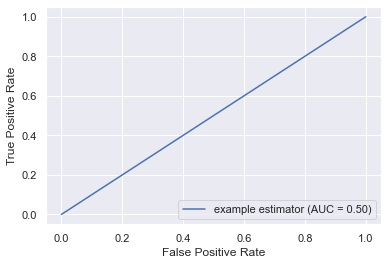

In [109]:
# Plot ROC-AUC curve
y = np.array(y_inf)
pred = np.array(y_inf_pred)

fpr, tpr, thresholds = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

In [110]:
print('==================== Inference Results (AdaBoost) ====================')
print(roc_auc_score(y_inf, best_pipe_Ada.predict(X_inf)))

==================== Inference Results (AdaBoost) ====================
0.5


### Inference Process Evaluation

From above process, We can see that:
- The model successfully predict the class `0`, but failed to predict the class `1`.
- From the `ROC-AUC Score`, I can say that the model has neutral position in terms of predicting both class.


## X. Conclusion

Here all the conclusion that I get from this project

## EDA Analysis

**Univariate Analysis**

In [131]:
# Number of unique value
print(df['subs_status'].value_counts())
print()
print(df['subs_status'].value_counts(normalize=True)*100)

0    36537
1     4639
Name: subs_status, dtype: int64

0    88.733728
1    11.266272
Name: subs_status, dtype: float64


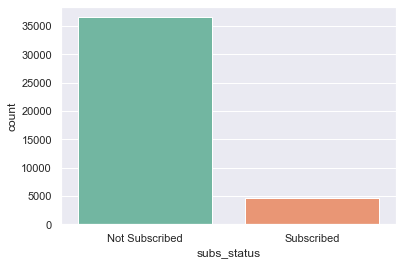

In [130]:
# Distribution Check

g= sns.countplot(df['subs_status'], palette='Set2')
g.set(xticklabels=['Not Subscribed', 'Subscribed'])
plt.show()

- The target paramater `subs_status` is `categorical` parameter that has two unique value which is `1/Subscribed` and `0/Not Subscribed`
- In the dataset, the majority of the instances is category `0/Not Subscribed` which fill `88.74%` of total instance.
- Hence the dataset is considered as imbalance dataset.


**Bivariate Analysis**

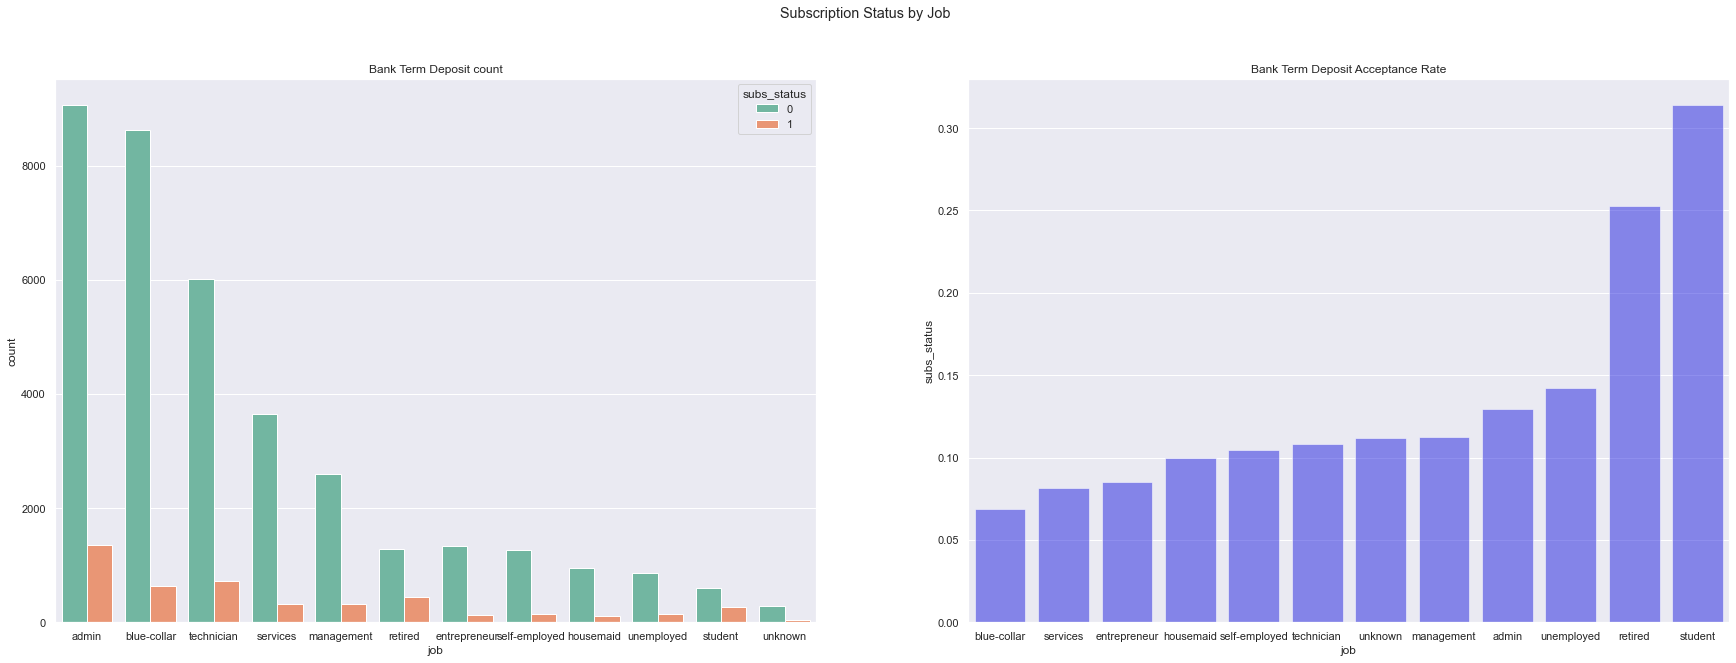

In [111]:
# Analysis by the `job` variable
fig, ax = plt.subplots(1,2, figsize=(30, 10))
plt.suptitle('Subscription Status by Job')

sns.countplot(df['job'], hue=df['subs_status'], palette='Set2', order=df['job'].value_counts().index, ax=ax[0])
ax[0].set_title('Bank Term Deposit count')

graph = df.groupby('job')['subs_status'].mean().sort_values()
sns.barplot(x=graph.index, y=graph, color='blue', alpha=0.5, ax=ax[1])
ax[1].set_title('Bank Term Deposit Acceptance Rate')

plt.show()

Subscription Status by Job:
- `admin` and `blue-collar` are the frequent contacted client by the company. 
- In contrast, `students` and `retired` has highest acceptance rate.

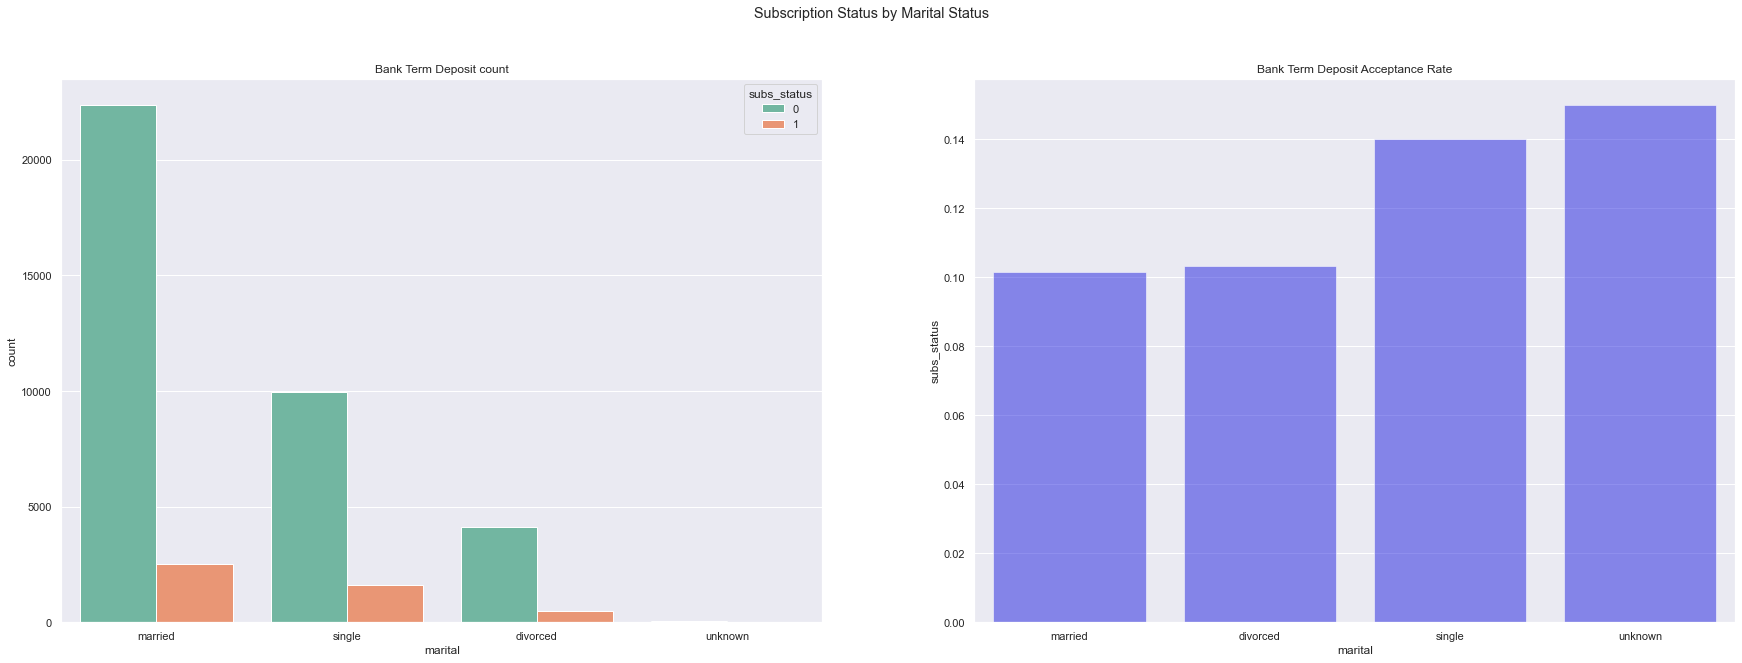

In [112]:
# Analysis by the `marital` variable
fig, ax = plt.subplots(1,2, figsize=(30, 10))
plt.suptitle('Subscription Status by Marital Status')

sns.countplot(df['marital'], hue=df['subs_status'], palette='Set2', order=df['marital'].value_counts().index, ax=ax[0])
ax[0].set_title('Bank Term Deposit count')

graph = df.groupby('marital')['subs_status'].mean().sort_values()
sns.barplot(x=graph.index, y=graph, color='blue', alpha=0.5, ax=ax[1])
ax[1].set_title('Bank Term Deposit Acceptance Rate')

plt.show()

Subscription Status by Marital Status:
- `married` and `single` clients are the frequent contacted client by the company. 
- In contrast, although `unknown` is the smallest class of all, they has the highest acceptance rate, followed by `single`.

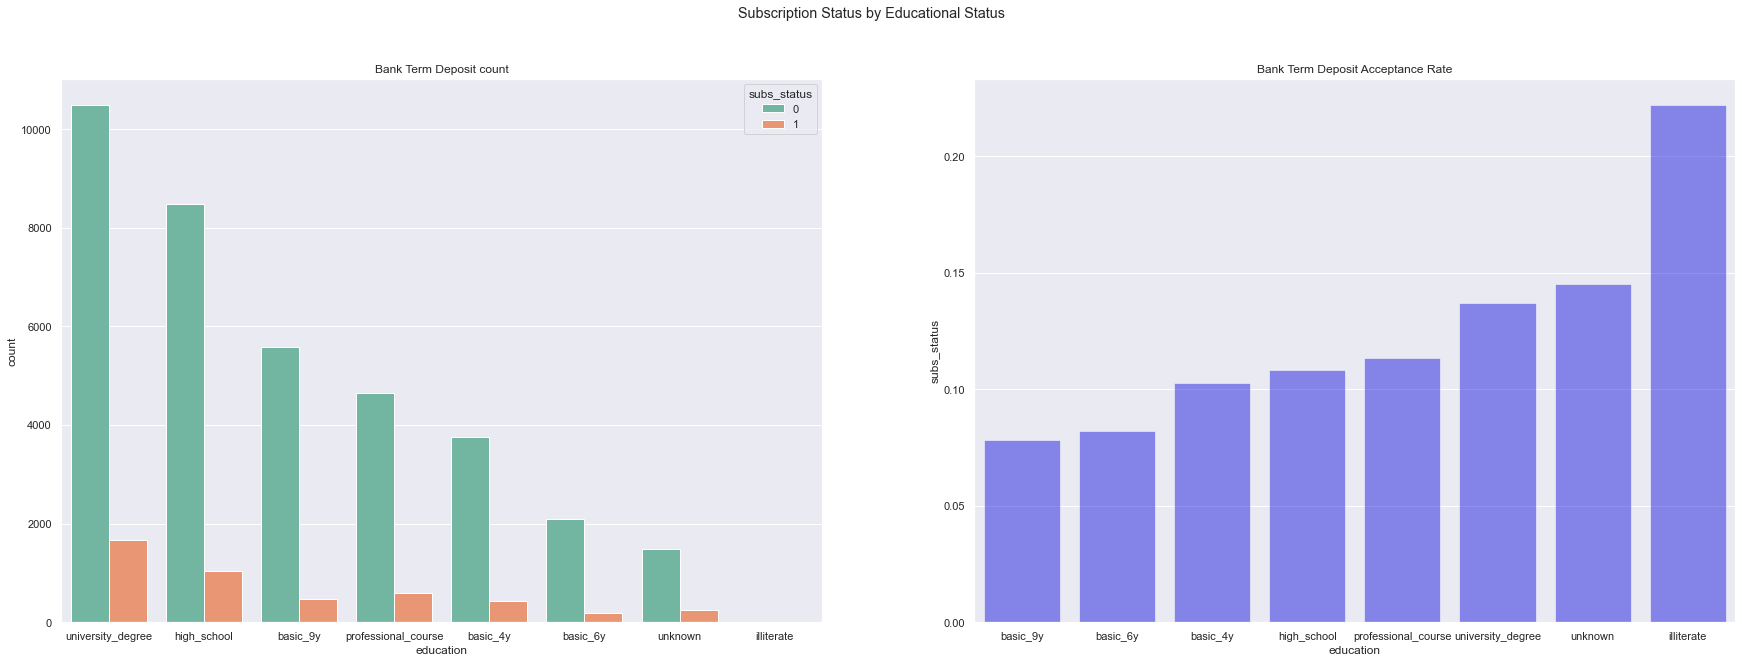

In [113]:
# Analysis by the `education` variable
fig, ax = plt.subplots(1,2, figsize=(30, 10))
plt.suptitle('Subscription Status by Educational Status')

sns.countplot(df['education'], hue=df['subs_status'], palette='Set2', order=df['education'].value_counts().index, ax=ax[0])
ax[0].set_title('Bank Term Deposit count')

graph = df.groupby('education')['subs_status'].mean().sort_values()
sns.barplot(x=graph.index, y=graph, color='blue', alpha=0.5, ax=ax[1])
ax[1].set_title('Bank Term Deposit Acceptance Rate')

plt.show()

Subscription Status by Education:
- Most frequent contacted clients are the clients that has `University_degree` and/or `high_school` education.
- In line with fact above, `university_degree`, `professional_course`, and `high_school` are client that accepted the subscription of `bank term deposit`.

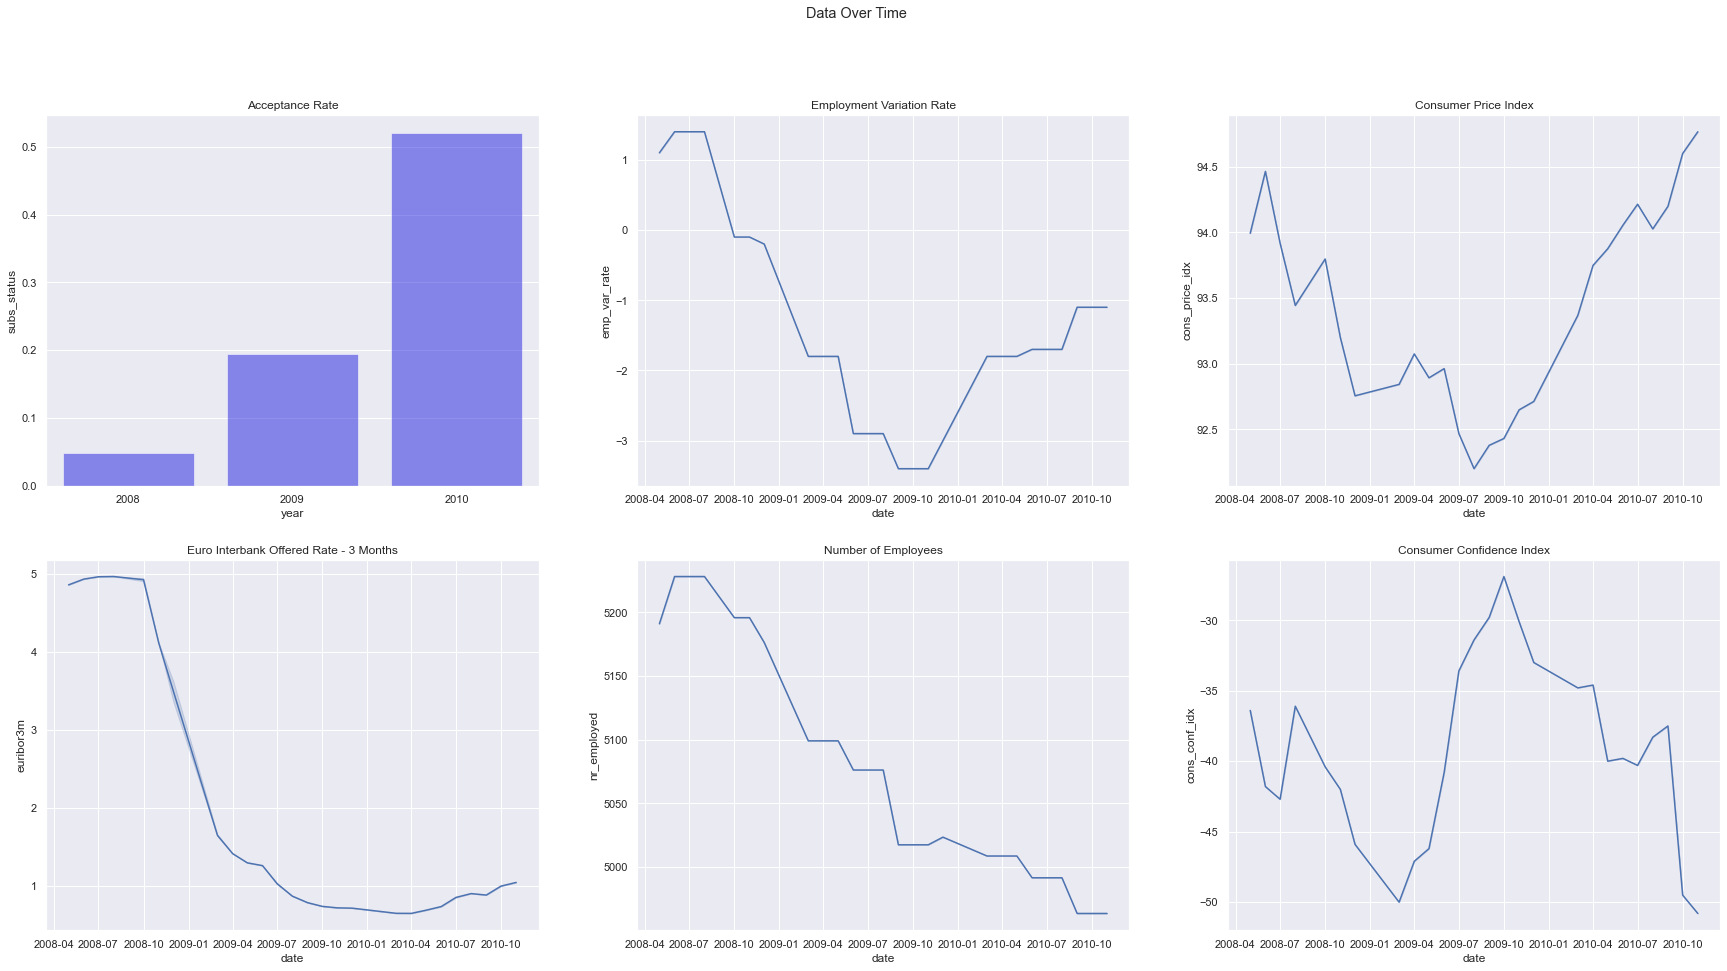

In [114]:
# Analysis by the `education` variable
fig, ax = plt.subplots(2,3, figsize=(30, 15))
plt.suptitle('Data Over Time')

graph = _df.groupby('year')['subs_status'].mean().sort_values()
sns.barplot(x=graph.index, y=graph, color='blue', alpha=0.5, ax=ax[0,0])
ax[0,0].set_title('Acceptance Rate')

sns.lineplot(data=_df, x='date', y='emp_var_rate', ax=ax[0,1])
ax[0,1].set_title('Employment Variation Rate')

sns.lineplot(data=_df, x='date', y='cons_price_idx', ax=ax[0,2])
ax[0,2].set_title('Consumer Price Index')

sns.lineplot(data=_df, x='date', y='euribor3m', ax=ax[1,0])
ax[1,0].set_title('Euro Interbank Offered Rate - 3 Months')

sns.lineplot(data=_df, x='date', y='nr_employed', ax=ax[1,1])
ax[1,1].set_title('Number of Employees')

sns.lineplot(data=_df, x='date', y='cons_conf_idx', ax=ax[1,2])
ax[1,2].set_title('Consumer Confidence Index')

plt.show()

Data Over Time
- Acceptance rate of `bank term deposit` gradually increase over the time.
- `Employment variation rate and consumer price index` has similar trends and both of them has inverse trends with `Consumer Confidence Index`.
- We can see as `euribor3m` decrease, the acceptance rate of `bank term deposit` is increasing.

**Multivariate Analysis**

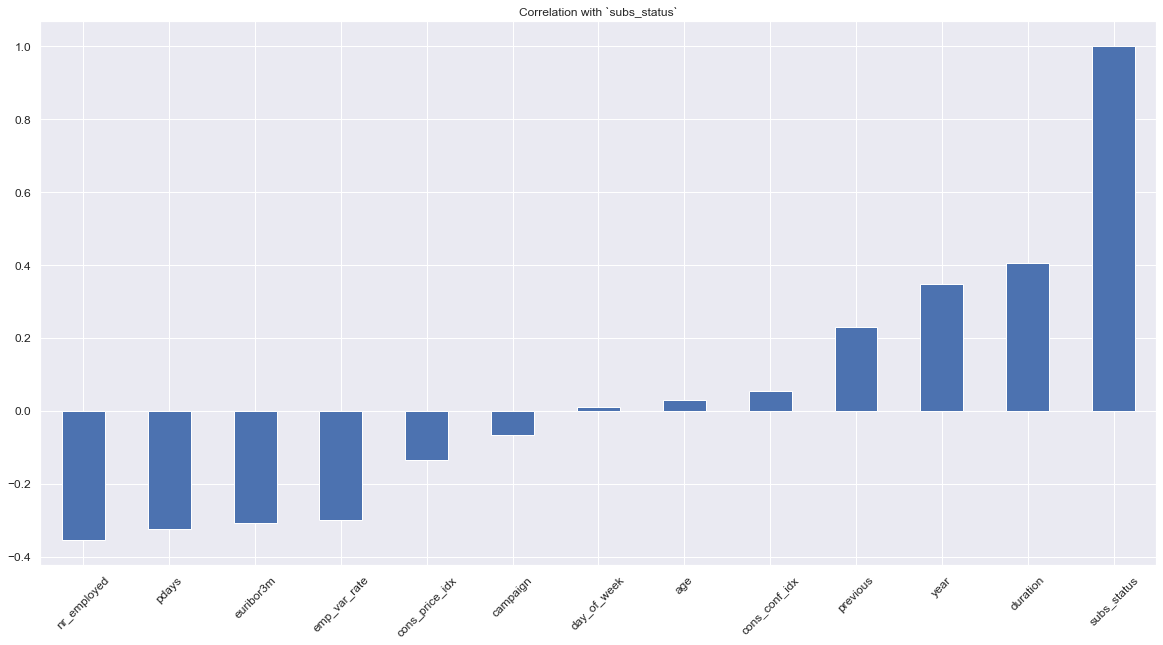

In [115]:
# Checking correlation between target variable and input variables

df.corrwith(df['subs_status']).sort_values().plot.bar(figsize=(20,10), title='Correlation with `subs_status`', fontsize=12, rot=45, grid=True)
plt.show()

Based on graph above, I can summarize top variable that correlate with `subs_status` target variable:

- top three negatively correlated : `nr_employed, pdays, euribor3m, emp_var_rate`
- top three positively correlated : `duration, year, and previous`

This correlation matrix is inline with `data over time` graph I made on the previous sub-process.

## Model Analysis

**Model-Algortihm**

In this project I will try several `Supervised Learning` Algorithm, which are:
- Logistic Regression
- SVM
- Decision Tree
- Random Forest
- KNN
- Naive Bayes
- AdaBoost

**Model Evaluation**

Based on cross-validation process, here is the result of each model:

In [116]:
# Showing the result
cv_result.sort_values(by='mean_score', ascending=False)

,models,mean_score,stdev_score
6,Ada,0.8772,0.0011
3,RF,0.8769,0.0013
0,Logreg,0.8746,0.0012
4,KNN,0.8703,0.0042
1,Lin_SVC,0.8701,0.0012
2,DT,0.8396,0.0025
5,NB,0.6637,0.0057


- Based on result above, we can see the top model is `AdaBoost`, it has the best `mean_score` and lowest `std_score`.
- Actually, in my opinion our base model actually perform pretty good, they had similar mean score with low standard 
deviation score, this indicate those model is `precision and accurate enough.`
- The most under performed model in this case is only `Naive Bayes` model.

I decided to chose the top three performing model and do the hyper parameter tuning for each of them.

**Hyper Parameter Tuning**

`AdaBoost`:
- algorithm: `SAMME.R`
- learning_rate: `1`
- n_estimators: `200`

`Random Forest`:
- criterion: `gini`
- min_samples_split: `auto`
- max_features: `8`

`Logistic Regression`:
- C: `100`
- solver: `liblinear`

**Performance Summary**

**AdaBoost**

In [117]:
#Performance Metrics
print('==================== Train Results (AdaBoost) ====================')
print(classification_report(y_train, best_pipe_Ada.predict(X_train)))

#Performance Metrics
print('==================== Train Results (AdaBoost) ====================')
print(roc_auc_score(y_train, best_pipe_Ada.predict(X_train)))

print('==================== Test Results (AdaBoost) ====================')
print(classification_report(y_test, best_pipe_Ada.predict(X_test)))


print('==================== Test Results (AdaBoost) ====================')
print(roc_auc_score(y_test, best_pipe_Ada.predict(X_test)))

==================== Train Results (AdaBoost) ====================
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     25566
           1       0.68      0.23      0.35      3246

    accuracy                           0.90     28812
   macro avg       0.80      0.61      0.65     28812
weighted avg       0.88      0.90      0.88     28812

==================== Train Results (AdaBoost) ====================
0.6087013308890057
==================== Test Results (AdaBoost) ====================
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10957
           1       0.67      0.21      0.32      1391

    accuracy                           0.90     12348
   macro avg       0.79      0.60      0.63     12348
weighted avg       0.88      0.90      0.88     12348

==================== Test Results (AdaBoost) ====================
0.599016959768291


**Random Forest**

In [118]:
#Performance Metrics
print('==================== Train Results (Random Forest) ====================')
print(classification_report(y_train, best_pipe_RF.predict(X_train)))

#Performance Metrics
print('==================== Train Results (Random Forest) ====================')
print(roc_auc_score(y_train, best_pipe_RF.predict(X_train)))

print('==================== Test Results (Random Forest) ====================')
print(classification_report(y_test, best_pipe_RF.predict(X_test)))

print('==================== Test Results (Random Forest) ====================')
print(roc_auc_score(y_test, best_pipe_RF.predict(X_test)))

==================== Train Results (Random Forest) ====================
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     25566
           1       0.93      0.49      0.64      3246

    accuracy                           0.94     28812
   macro avg       0.93      0.74      0.81     28812
weighted avg       0.94      0.94      0.93     28812

==================== Train Results (Random Forest) ====================


[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s


0.7438217968845232
==================== Test Results (Random Forest) ====================


[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s


              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10957
           1       0.63      0.27      0.37      1391

    accuracy                           0.90     12348
   macro avg       0.77      0.62      0.66     12348
weighted avg       0.88      0.90      0.88     12348

==================== Test Results (Random Forest) ====================
0.6232724196612771


[Parallel(n_jobs=16)]: Done 100 out of 100 | elapsed:    0.0s finished


**Logistic Regression**

In [119]:
#Performance Metrics
print('==================== Train Results (Logistic Regression) ====================')
print(classification_report(y_train, best_pipe_Logreg.predict(X_train)))

#Performance Metrics
print('==================== Train Results (Logistic Regression) ====================')
print(roc_auc_score(y_train, best_pipe_Logreg.predict(X_train)))

print('==================== Test Results (Logistic Regression) ====================')
print(classification_report(y_test, best_pipe_Logreg.predict(X_test)))

print('==================== Test Results (Logistic Regression) ====================')
print(roc_auc_score(y_test, best_pipe_Logreg.predict(X_test)))

==================== Train Results (Logistic Regression) ====================
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     25566
           1       0.67      0.21      0.32      3246

    accuracy                           0.90     28812
   macro avg       0.79      0.60      0.63     28812
weighted avg       0.88      0.90      0.88     28812

==================== Train Results (Logistic Regression) ====================
0.5997110085700408
==================== Test Results (Logistic Regression) ====================
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10957
           1       0.69      0.22      0.33      1391

    accuracy                           0.90     12348
   macro avg       0.80      0.60      0.64     12348
weighted avg       0.88      0.90      0.88     12348

==================== Test Results (Logistic Regression) ====================
0.603832365550006

**Model Analysis Conclusion**

- Both `Adaboost` and `Logistic Regression` model is `good fit.`, while `Random Forest` model is `overfitting.`
- All three model has tendency to predict relatively well on class `Not Subscribed` compared to class `Subscribed`.

For Inference test, I will use `Adaboost` as my main model.

## Inference Result

In [120]:
# Evaluation for inference set
print('==================== Inference Results (AdaBoost) ====================')
print(classification_report(y_inf, y_inf_pred))

print('==================== Inference Results (AdaBoost) ====================')
print(roc_auc_score(y_inf, best_pipe_Ada.predict(X_inf)))

==================== Inference Results (AdaBoost) ====================
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        14
           1       0.00      0.00      0.00         2

    accuracy                           0.88        16
   macro avg       0.44      0.50      0.47        16
weighted avg       0.77      0.88      0.82        16

==================== Inference Results (AdaBoost) ====================
0.5


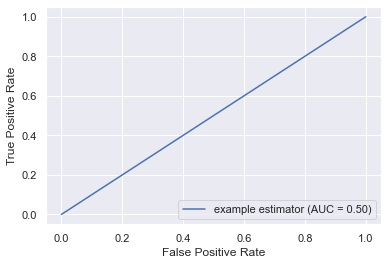

In [121]:
# Plot ROC-AUC curve
y = np.array(y_inf)
pred = np.array(y_inf_pred)

fpr, tpr, thresholds = roc_curve(y, pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()

From above process, We can see that:
- The model successfully predict the class `Not Subscribed`, but failed to predict the class `Subscribed`.
- From the `ROC-AUC Score`, I can say that the model has neutral position in terms of predicting both class.